# Imports et setup technique

In [1]:
import pandas as pd
idx = pd.IndexSlice
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np
import seaborn as sns
from bokeh.io import output_notebook, show
output_notebook()
from bokeh.plotting import figure
from bokeh.models.annotations import BoxAnnotation
from datetime import datetime

Loading BokehJS ...

# Chargement des données

## Données de base client

In [2]:
cltfields = {
             'client': 'object',
             'V': 'object',
             'groupecompte': 'object',
             'nom': 'object',
             'postalcode': 'object',
             'seg1': 'object',
             'seg2': 'object',
             'seg3': 'object',
             'seg4': 'object',
             'cat': 'object',
             'sscat': 'object',
#              'saiso': 'bool',
             'surcat': 'object',
#              'ecom': 'bool', 
             'sectact': 'object',
             'canal': 'object', 
             'orgacom': 'object', 
             'grpclt1': 'object',
             'grpclt2': 'object',
             'grpclt3': 'object',
             'grpclt4': 'object',
             'grpclt5': 'object',
             'agence': 'object', 
             'condexp': 'object', 
             'pricetype': 'object', 
             'relationtype': 'object',
             'pilcom': 'object',
             'hier4': 'object',
             'hier3': 'object',
             'hier2': 'object',
             'hier1': 'object',
            }

clt_fields2 = {
             'client': 'object',
             'V': 'category',
             'groupecompte': 'category',
             'nom': 'object',
             'postalcode': 'category',
             'seg1': 'category',
             'seg2': 'category',
             'seg3': 'category',
             'seg4': 'category',
             'cat': 'category',
             'sscat': 'category',
#              'saiso': 'bool',
             'surcat': 'category',
#              'ecom': 'bool', 
             'sectact': 'category',
             'canal': 'category', 
             'orgacom': 'category', 
             'grpclt1': 'category',
             'grpclt2': 'category',
             'grpclt3': 'category',
             'grpclt4': 'category',
             'grpclt5': 'category',
             'agence': 'category', 
             'condexp': 'category', 
             'pricetype': 'category', 
             'relationtype': 'category',
             'pilcom': 'category',
             'hier4': 'object',
             'hier3': 'object',
             'hier2': 'object',
             'hier1': 'object',
            }

filenames = [
    'ref_clt.csv',
    'ref_clt2.csv',
    'export2BRE_clt.csv',
    'exportcomp1ALO.csv',
]
paths = [Path('..') / 'data' / filename for filename in filenames]

df_clts = [
    pd.read_csv(path,
                sep=';',
                encoding='latin1', 
                dtype=cltfields,
                converters={'saiso': lambda x: True if x == 'YES' else False, 
                            'ecom': lambda x: True if x == 'X' else False},
                ) for path in paths
]

df_clt = pd.concat(df_clts, axis=0)
for field, dtype in clt_fields2.items(): 
    if field not in df_clt.columns:
        print(field)
df_clt = df_clt.astype(clt_fields2)
df_clt.sample(5)

client  V groupecompte                             nom postalcode seg1  \
21396  124104  A         ZHIE                CAISSE DU 14 EME      75675  NaN   
8259    86863  A         ZCLT           CGF AFPA CAMPUS LAVAL      53000   Z3   
18281  225755  A         ZCLT  ASSOCIATION MAISON ST FRANCOIS      35000   Z3   
30091  174533  A         ZLIV       RESIDENCE LE CLOS CAYCHAC      33290  NaN   
33712  196735  A         ZCHN          ORPEA Res les Pivoines      16340   Z3   

      seg2 seg3 seg4  cat  ... grpclt5  agence condexp  pricetype  \
21396  NaN  NaN  NaN  NaN  ...     NaN     NaN     NaN        NaN   
8259    Z4   ZJ   ZF   ZL  ...     L51    2MAY      ST        NaN   
18281   Z4   ZI   ZB   ZN  ...     051    2REN      ST         T2   
30091  NaN  NaN  NaN  NaN  ...     051     NaN      ST        NaN   
33712   Z4   ZJ   ZF   ZN  ...     001    1BDX      ST        NaN   

      relationtype pilcom   hier4   hier3   hier2   hier1  
21396          NaN    NaN     NaN     NaN     NaN     NaN  
8259           DIR    BIG   10337   86629   86665  175870  
18281          NDI    NTL   10851   10852   10853  117639  
30091          NaN    NaN   10181   10183   10184   10193  
33712          DIR    NTL  195829  195832  195833  195834  

[5 rows x 31 columns]

In [3]:
# remove emppty client codes
df_clt = df_clt.loc[~df_clt.client.isna()]

# zero pad numeric clients codes
num_clt_mask = df_clt['client'].str.isnumeric()
df_clt.loc[num_clt_mask, 'client'] = df_clt.loc[num_clt_mask, 'client'].str.zfill(10)

#remove duplicated clients
print(f'Clients count before cleansing : {df_clt.client.count()}')
print(f"Duplicated clients before cleansing: {sum(df_clt.loc[:, ['client', 'orgacom']].duplicated(keep=False))}")
df_clt = df_clt.loc[~(df_clt.loc[:, ['client', 'orgacom']].duplicated(keep=False) & df_clt.sectact.isna())]
print(f"Clients count after cleansing : {df_clt.client.count()}")
print(f"Duplicated clients after cleansing: {sum(df_clt.loc[:, ['client', 'orgacom']].duplicated(keep=False))}")

# set the index
df_clt.set_index(['orgacom', 'client'], inplace=True, drop=True)

Clients count before cleansing : 104640
Duplicated clients before cleansing: 4634
Clients count after cleansing : 102323
Duplicated clients after cleansing: 0


In [4]:
df_clt.sample(5)

V groupecompte                         nom postalcode  \
orgacom client                                                              
1SOU    0000284698  A         ZCRC    RESTAL FOYER MED CELHAYA      64250   
        0005008775  A         ZCTR                        ACEH      62450   
2BRE    0000147896  A         ZCLT            VILAMI RECEPTION      53230   
1LRO    0000255274  A         ZHIE  GROUPE BERTRAND BRASSERIES      75008   
1SOU    0000207227  A         ZHIE                         GBI      44000   

                   seg1 seg2 seg3 seg4  cat sscat  ...  grpclt5 agence  \
orgacom client                                     ...                   
1SOU    0000284698   Z3   Z4   ZJ   ZF   ZN   Z19  ...      L51   1PAU   
        0005008775   Z4   Z0   ZQ   ZO   Z6   Z28  ...      NaN    NaN   
2BRE    0000147896   Z3   Z5   ZK   ZG   ZY    ZY  ...      L51   2MAY   
1LRO    0000255274  NaN  NaN  NaN  NaN  NaN   NaN  ...      NaN    NaN   
1SOU    0000207227  NaN  NaN  NaN  NaN  NaN   NaN  ...      NaN    NaN   

                    condexp pricetype relationtype pilcom  hier4  hier3  \
orgacom client                                                            
1SOU    0000284698       ST       NaN          DIR    NTL  10987  10988   
        0005008775       EN       NaN          NaN    NaN    NaN    NaN   
2BRE    0000147896       ST        T3          NDI    RGL    NaN    NaN   
1LRO    0000255274      NaN       NaN          NaN    NaN    NaN    NaN   
1SOU    0000207227      NaN       NaN          NaN    NaN    NaN    NaN   

                    hier2  hier1  
orgacom client                    
1SOU    0000284698  10991  10997  
        0005008775    NaN    NaN  
2BRE    0000147896    NaN    NaN  
1LRO    0000255274    NaN    NaN  
1SOU    0000207227    NaN    NaN  

[5 rows x 29 columns]

In [5]:
if sum(df_clt.index.duplicated()):
    raise RuntimeError('Something went wrong on the client dataframe! Some indices are duplicated!')

In [6]:
print(*df_clt.groupecompte.unique())

ZCLT ZFAC ZCHN ZCFR ZPER ZLIV ZCRC ZHIE ZCOL ZREG ZCTR ZCFE ZCAC ZCFG ZCPP ZCRI ZCRM ZGPE 0100 ZCPD ZCAB


Libellés des segments clients :

In [7]:
path = Path('..') / 'data' / 'libelles_segments.csv'
lib_seg = pd.read_csv(path,
                      sep=';',
                      encoding='latin1',
                      header=None,
                      names=['level', 'code', 'designation'],
                      index_col=['level', 'code']
                     )
lib_seg

designation
level code                     
1     Z1           Distribution
      Z3                    RHD
      Z4                 Divers
2     Z0      Autres clientèles
      Z1                    GMS
...                         ...
6     ZI    Police Pomp Gendarm
      ZJ    Gastro -semi gastro
      ZK          Moyenne gamme
      ZL             Economique
      ZM    Petit déj. exclusif

[136 rows x 1 columns]

## Historiques de vente

In [8]:
# path = Path('..') / 'data' / 'EXTRACT_LIGNES_VENTES.csv'
# path = Path('..') / 'data' / 'EXTRACT_LIGNES_VENTES_v2.csv'
path_list = [Path('..') / 'data' / filename for filename in ['EXTRACT_LIGNES_VENTES_V3.csv',
                                                             'EXTRACTION_2BRE.csv']]
fields = {'orgacom': pd.CategoricalDtype(['1SOU', '1ALO', '1LRO', '2BRE'], ordered=True),
          'month': 'category',
          'week': 'category',
          'date': 'object',
          'pricetype': 'category',
          'client': 'object',
          'doctype': 'category',
          'origin': pd.CategoricalDtype(['TV', 'VR', 'EDI', 'WEB', '#', 'SCHR', 'TELE',
                                         'MUEN', 'FRN', 'DFUE'], ordered=True),
          'salesgroup': 'category',
          'material': 'object',
          'brutrevenue': 'float',
          'brutrevcur': 'category', 
          'netrevenue': 'float', 
          'netrevcur': 'category',
          'weight': 'float',
          'weightunit': 'category',
          'margin': 'float', 
          'margincur': 'category', 
          'marginperkg': 'float',
         }

In [9]:
data = [pd.read_csv(path,
                   sep=';',
                   header=None,
                   names=list(fields.keys()),      
                   dtype=fields, 
                   parse_dates=['date'],
                  ) for path in path_list]
data = pd.concat(data, axis=0)
data.sample(5)

orgacom   month    week       date pricetype      client doctype  \
9937071     1LRO  201806  201824 2018-06-15      ZTCE  0000131717    ZC10   
27933223    1ALO  202002  202007 2020-02-13      ZTCE  0000027464    ZC10   
29492946    1ALO  202005  202020 2020-05-11      ZTCE  0000027221    ZC10   
6476955     2BRE  202003  202010 2020-03-02      ZTCE  0000078520    ZC10   
15440685    1LRO  201812  201849 2018-12-07      ZTCE  0000198516    ZC10   

         origin salesgroup            material  brutrevenue brutrevcur  \
9937071      TV        736  000000000000183026        27.60        EUR   
27933223    EDI        587  000000000000088104        11.98        EUR   
29492946    EDI        610  000000000000063800        14.77        EUR   
6476955     EDI        A16  000000000000044997        11.42        EUR   
15440685    EDI        738  000000000000084444         6.36        EUR   

          netrevenue netrevcur  weight weightunit  margin margincur  \
9937071        26.77       EUR     2.0         KG    2.61       EUR   
27933223       11.13       EUR    10.0         KG    2.40       EUR   
29492946       14.51       EUR     5.0         KG    1.45       EUR   
6476955         8.16       EUR    10.0         KG   -4.05       EUR   
15440685        6.08       EUR     5.0         KG    1.11       EUR   

          marginperkg  
9937071          1.31  
27933223         0.24  
29492946         0.29  
6476955         -0.41  
15440685         0.22

## Calcul d'un numéro de commande
On détermine un numéro de commande, afin de regrouper les lignes qui semblent correspondre à une même commande.
La clé de regroupement est :
  - Organisation commerciale
  - Client
  - Date

In [10]:
orders = data.loc[:, ['orgacom', 'client', 'date']].drop_duplicates().reset_index(drop=True)
orders.index.name = 'order_num'

In [11]:
data2 = data.merge(orders.reset_index(), 
                   on=['orgacom', 'client', 'date'])
data2.insert(0, 'order_num', data2.pop('order_num'))

In [12]:
if len(data2) != len(data):
    raise RuntimeError('Something went wrong when computing orders num!')
data = data2
del data2

## Filtres sur les données
### Filtre sur les types de documents
Définition des types de poste valides et invalides.
PAR CONTRE, on ne filtre plus les documents de type avoir !

In [13]:
valid_doctypes = ['ZC01', 'ZC02', 'ZC10']
invalid_doctypes = ['ZR01', 'ZR02', 'ZA01', 'ZA02', 'ZA03', 'ZA04', 'ZC20']
doctypes = valid_doctypes + invalid_doctypes

In [14]:
if len(data.loc[~data.doctype.isin(doctypes)]) > 0:
    raise RuntimeError(f'An unexpected doctype has been encountered: '
                       f'{data.loc[~data.doctype.isin(doctypes), "doctype"].iloc[0]}!')

In [15]:
mask = data.doctype.isin(valid_doctypes)
# raw_data = data.copy()
# before_count = len(raw_data)
# data = raw_data.loc[mask]
# after_count = len(data)
# print(f'{before_count - after_count} lines have been delete due to doctype filtering.')
# print(f'{after_count} lines remain.')

## Nettoyage des poids / CA à zéro
On contrôle d'abord qu'il n'y a pas de ligne de commande avec un poids à zéro mais un CA associé

In [16]:
if len(data.loc[mask & (data.weight == 0) & (data.brutrevenue != 0)]) > 0:
    print('Some sales have no weight but have brut revenue!')
data.loc[mask & (data.weight == 0) & (data.brutrevenue != 0), 'material'].unique()

Some sales have no weight but have brut revenue!


array(['FL ACCOR', 'FL39860', 'FL66446', 'FC42378', '000000000000156486',
       'FC34504', 'FC34502', 'FC34503'], dtype=object)

On contrôle que le CA brut des commandes est toujours positif.

In [17]:
if len(data.loc[mask & (data.brutrevenue < 0)]) > 0: 
    raise RuntimeError('Some sales have negative brut revenue!')

On supprime les lignes qui ont un poids nul : => NON, on ne le fait pas dans cette nouvelle version !

In [18]:
# mask = mask & (data.weight != 0)
# before_count = len(data)
# data = data.loc[mask]
# after_count = len(data)
# print(f'{before_count - after_count} lines have been delete due to zero weight filtering.')
# print(f'{after_count} lines remain.')

## Calcul des indicateurs manquants

In [19]:
data['purchcost'] = data.brutrevenue - data.margin
data['purchcostperkg'] = data.purchcost / data.weight
data['PMVK'] = data.brutrevenue / data.weight
data['marginpercent'] = (data.margin / data.brutrevenue).replace({np.inf: np.nan, -np.inf: np.nan})

## Définition des formats des indicateurs

In [20]:
formats = {
    'weight': '{:.2f} kg',
    'margin': '{:.2f} €',
    'brutrevenue': '{:.2f} €',
    'linecount': '{:.2f}',
    'PMVK': '{:.2f} €/kg',
    'marginperkg': '{:.2f} €/kg',
    'marginpercent': '{:.2%}',
    'lineweight': '{:.2f} kg',
    'weight_clt_zscore': '{:.3f}',
    'margin_clt_zscore': '{:.3f}',
    'brutrevenue_clt_zscore': '{:.3f}',
    'linecount_clt_zscore': '{:.3f}',
    'PMVK_clt_zscore': '{:.3f}',
    'marginperkg_clt_zscore': '{:.3f}',
    'marginpercent_clt_zscore': '{:.3f}',
    'lineweight_clt_zscore': '{:.3f}',    
}

## Nettoyage des avoirs
### Constat d'erreurs et corrections sur les prix
Il apparaît que certaines erreurs sur les prix qui faussent l'analyse ont eu un impact fort sur les indicateurs :

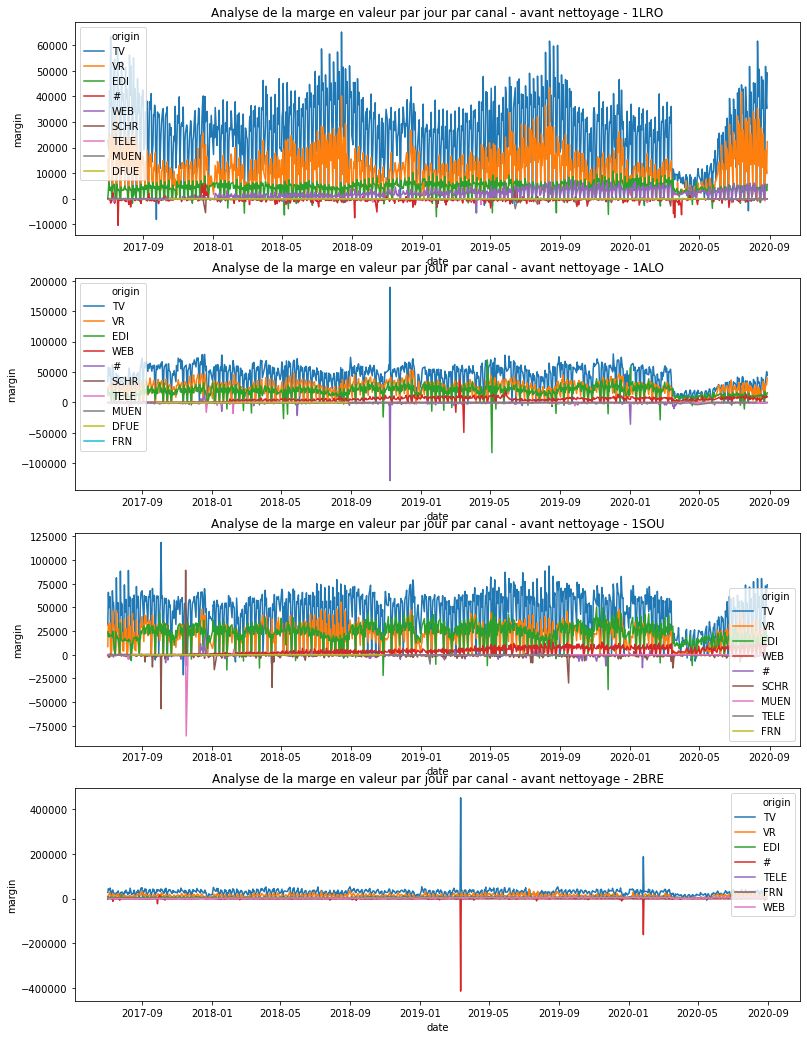

In [21]:
fig, axs = plt.subplots(figsize = (13, 18), nrows=len(data.orgacom.unique()))
orgacoms = data.orgacom.unique().tolist()
data_to_plot = [(
    data.loc[data.orgacom == orgacom]
        .groupby(['date', 'origin'])['margin']
        .sum()
        .unstack('origin')
        .rolling(1)
        .mean()
        .stack('origin')
        .rename('margin')
        .reset_index()
) for orgacom in orgacoms]

for i, data_ in enumerate(data_to_plot):
    sns.lineplot(data=data_, x='date', y='margin', hue='origin', ax=axs[i])
    axs[i].set_title(f'Analyse de la marge en valeur par jour par canal - avant nettoyage - {orgacoms[i]}')


# fig, ax = plt.subplots(figsize=(15, 12))
# data_to_plot = (
# data.loc[data.orgacom == '1ALO']
#     .groupby(['date', 'origin'])['margin']
#     .sum()
#     .unstack('origin')
#     .rolling(1)
#     .mean()
#     .stack('origin')
#     .rename('margin')
#     .reset_index()
# )
# sns.lineplot(data=data_to_plot, x='date', y='margin', hue='origin', ax=ax)
# ax.set_title('Analyse de la marge en valeur par jour par canal - avant nettoyage')
# ax.set_xticklabels([])

On voit 3 gros pics négatifs qui sont des corrections d'erreur sur les prix, mais pas affectés au canal correspondant.

### Calcul d'une table des avoirs, aggrégée

In [22]:
myfields = ['orgacom',
            'doctype',
            'date',
            'origin',
            'material',
            'client',
            'brutrevenue',
            'weight',
            'PMVK',
            'marginperkg',
            'margin',
            'purchcost',
            'purchcostperkg']

In [23]:
def process_df(df,
               orders_doctypes=['ZC10'],
               avoirs_doctypes=['ZA01', 'ZA02'],
               indicators=['margin', 'brutrevenue', 'weight'],
               grouper_fields=['orgacom', 'date', 'client', 'material'],
              ):
    before_processing = df[indicators].sum()
    mask_ZC = df.doctype.isin(orders_doctypes)
    mask_ZA = df.doctype.isin(avoirs_doctypes)
    raw_avoirs = df.loc[mask_ZA, grouper_fields + indicators].copy()
    avoirs = raw_avoirs.groupby(grouper_fields, observed=True).sum()
    mask_dup_ZC = df.loc[mask_ZC].duplicated(grouper_fields, keep=False).rename('_duplicated')
    mask_dup_ZC = mask_dup_ZC.reindex(df.index, fill_value=False)
    df = (df.merge(mask_dup_ZC, how='left', left_index=True, right_index=True))
    to_update = (
    df.loc[~df._duplicated & mask_ZC, grouper_fields + indicators]
      .merge(avoirs, how='inner', left_on=grouper_fields, right_index=True, validate='1:1')
    )
    for indicator in indicators:
        to_update[indicator] = to_update[indicator + '_x'] + to_update[indicator + '_y']
    to_update = to_update.loc[(to_update.weight >= 0) & (to_update.brutrevenue >= 0)]
    to_update.drop(columns= [indicator + '_x' for indicator in indicators] + \
                            [indicator + '_y' for indicator in indicators] ,
                   inplace=True)
    a = df.margin.sum()
    mask_to_del = df.set_index(grouper_fields).index.isin(to_update.set_index(grouper_fields).index)
    df = df.loc[~mask_to_del | ~df.doctype.isin(avoirs_doctypes)]
    merged = df.merge(to_update, on=grouper_fields, how='left', indicator=True)
    del(to_update)
    merged_mask_ZC = merged.doctype.isin(orders_doctypes)
    for indicator in indicators:
        merged.loc[:, indicator] = merged[indicator + '_x'].where(merged[indicator + '_y'].isna() | ~merged_mask_ZC,
                                                                        merged[indicator + '_y'])
        merged = merged.drop(columns=[indicator + '_x', indicator + '_y'])
    merged = merged.drop(columns='_merge')
    df = merged
    del(merged)
    after_processing = df[indicators].sum()
    delta = after_processing - before_processing
    print(f'Evolution des indicateurs pendant le traitement : \n{delta}')
    if max(delta.max(), abs(delta.min())) > .1:
        raise RuntimeError('Something bad happened during avoir processing')
    return(df)

In [24]:
dfs = []
for suc in data.orgacom.unique():
    print(f'Début du traitement pour {suc}')
    to_process = data.loc[data.orgacom == suc]
    data = data.loc[data.orgacom != suc]
    dfs.append(process_df(to_process))

Début du traitement pour 1LRO
Evolution des indicateurs pendant le traitement : 
margin        -9.685755e-08
brutrevenue   -2.384186e-07
weight        -1.490116e-08
dtype: float64
Début du traitement pour 1ALO
Evolution des indicateurs pendant le traitement : 
margin        -7.450581e-07
brutrevenue    5.960464e-08
weight         7.450581e-08
dtype: float64
Début du traitement pour 1SOU
Evolution des indicateurs pendant le traitement : 
margin        -2.980232e-08
brutrevenue   -1.549721e-06
weight         1.341105e-07
dtype: float64
Début du traitement pour 2BRE
Evolution des indicateurs pendant le traitement : 
margin         2.086163e-07
brutrevenue   -1.490116e-07
weight         2.980232e-08
dtype: float64


In [25]:
data = pd.concat(dfs, axis=0)
del(dfs)
data.sample(10)

order_num orgacom   month    week       date pricetype      client  \
4020707      702408    1SOU  201806  201823 2018-06-05       ZTG  0000066116   
10551569    1788030    1SOU  201911  201947 2019-11-18      ZTCE  0000069674   
10065474    1707949    1SOU  201910  201941 2019-10-08      ZTCR  0000236592   
7766927     1326739    1SOU  201904  201915 2019-04-09      ZTCE  0000217746   
596536       112083    1ALO  201708  201735 2017-08-30       ZTG     P021031   
2243232      790866    1LRO  201807  201830 2018-07-27       ZTM  0000061079   
7316719     2652370    2BRE  202008  202034 2020-08-23       ZTM  0000073871   
8279146     1461754    1ALO  201906  201925 2019-06-23      ZTCE  0000025017   
3707473     2443981    2BRE  201901  201903 2019-01-18      ZTCE  0000200139   
2853669      509097    1ALO  201803  201811 2018-03-12      ZTCE  0000027117   

         doctype origin salesgroup  ... margincur marginperkg  purchcost  \
4020707     ZC10     TV        808  ...       EUR       11.49     106.09   
10551569    ZC10    EDI        801  ...       EUR        0.18      14.82   
10065474    ZC10     TV        964  ...       EUR        2.71      76.09   
7766927     ZC10     TV        817  ...       EUR        0.46       5.44   
596536      ZC10     TV        586  ...       EUR        2.91      18.16   
2243232     ZC10     VR        772  ...       EUR       14.57      15.51   
7316719     ZC10    WEB        I66  ...       EUR        0.00      -0.06   
8279146     ZC10    EDI        632  ...       EUR        0.00      -0.43   
3707473     ZC10    EDI        A27  ...       EUR        0.16       5.56   
2853669     ZC10    EDI        587  ...       EUR        0.25       8.42   

         purchcostperkg       PMVK marginpercent  _duplicated  margin  \
4020707       11.787778  23.275556      0.493555        False  103.39   
10551569       2.470000   2.645000      0.066163        False    1.05   
10065474       5.243970   7.951068      0.340470        False   39.28   
7766927        0.544000   1.004000      0.458167        False    4.60   
596536         3.632000   6.546000      0.445157        False   14.57   
2243232       23.935185  38.503086      0.378357        False    9.44   
7316719            -inf        NaN           NaN        False    0.06   
8279146            -inf        NaN           NaN        False    0.43   
3707473        1.486631   1.641711      0.094463        False    0.58   
2853669        3.673647   3.926702      0.064444        False    0.58   

          brutrevenue  weight  
4020707        209.48   9.000  
10551569        15.87   6.000  
10065474       115.37  14.510  
7766927         10.04  10.000  
596536          32.73   5.000  
2243232         24.95   0.648  
7316719          0.00   0.000  
8279146          0.00   0.000  
3707473          6.14   3.740  
2853669          9.00   2.292  

[10 rows x 25 columns]

In [26]:
# mask_ZC = data.doctype.isin(['ZC10'])
# mask_ZA = data.doctype.isin(['ZA01', 'ZA02'])
# myfields = ['orgacom',
#             'doctype',
#             'date',
#             'origin',
#             'material',
#             'client',
#             'brutrevenue',
#             'weight',
#             'PMVK',
#             'marginperkg',
#             'margin',
#             'purchcost',
#             'purchcostperkg']

In [27]:
# grouper_fields = ['orgacom', 'date', 'client', 'material']
# raw_avoirs = data.loc[mask_ZA, grouper_fields + ['margin', 'brutrevenue', 'weight']].copy()
# avoirs = raw_avoirs.groupby(grouper_fields, observed=True).sum()
# avoirs

On identifie ensuite les lignes de commandes qui ne sont pas dupliquées dans le dataset initial.

In [28]:
# mask_dup_ZC = data.loc[mask_ZC].duplicated(grouper_fields, keep=False).rename('_duplicated')
# print(f'Number of duplicated lines in orders: {sum(mask_dup_ZC)}')
# mask_dup_ZC = mask_dup_ZC.reindex(data.index, fill_value=False)
# data = (data.merge(mask_dup_ZC, how='left', left_index=True, right_index=True))

On calcule les indicateurs à remplacer : 
  - correspondent à des commandes, dont les lignes ne sont pas dupliquées
  - ne font pas passer les poids ou les CA bruts négatifs

In [29]:
# indicators = ['margin', 'weight', 'brutrevenue']
# to_update = (
# data.loc[~data._duplicated & mask_ZC, grouper_fields + indicators]
#     .merge(avoirs, left_on=grouper_fields, right_index=True, validate='1:1')
# )
# for indicator in indicators:
#     to_update[indicator] = to_update[indicator + '_x'] + to_update[indicator + '_y']
# to_update = to_update.loc[(to_update.weight >= 0) & (to_update.brutrevenue >= 0)]
# to_update.sample(5)

On contrôle que les quelques grosses lignes en erreur sont bien corrigées.

In [30]:
# to_update.sort_values('margin_x', ascending=False).head(5)

In [31]:
# to_update.margin_y.sum()

On retire les indicateurs temporaires : 

In [32]:
# to_update.drop(columns=['margin_x', 'margin_y', 'weight_x', 'weight_y', 'brutrevenue_x', 'brutrevenue_y'], inplace=True)

Suppression des avoirs :

In [33]:
# data.set_index(grouper_fields)

In [34]:
# mask_to_del = data.set_index(grouper_fields).index.isin(to_update.set_index(grouper_fields).index)

In [35]:
# data = data.loc[mask_to_del
#                 | ~data.doctype.isin(['ZA01', 'ZA02'])]

Mise à jour des lignes de commande : 

In [36]:
# merged = data.merge(to_update, on=grouper_fields, how='left', indicator=True)
# del(to_update)

In [37]:
# merged_mask_ZC = merged.doctype.isin(['ZC10',])
# for indicator in indicators:
#     merged.loc[:, indicator + '_z'] = merged[indicator + '_x'].where(merged[indicator + '_y'].isna() | ~merged_mask_ZC,
#                                                                     merged[indicator + '_y'])
    
# merged['margin_z'].sum()

In [38]:
# for indicator in indicators:
#     merged[indicator] = merged[indicator + '_z']
#     merged = merged.drop(columns=[indicator + '_x', indicator + '_y', indicator + '_z'])
# merged = merged.drop(columns='_merge')
# data = merged
# del(merged)

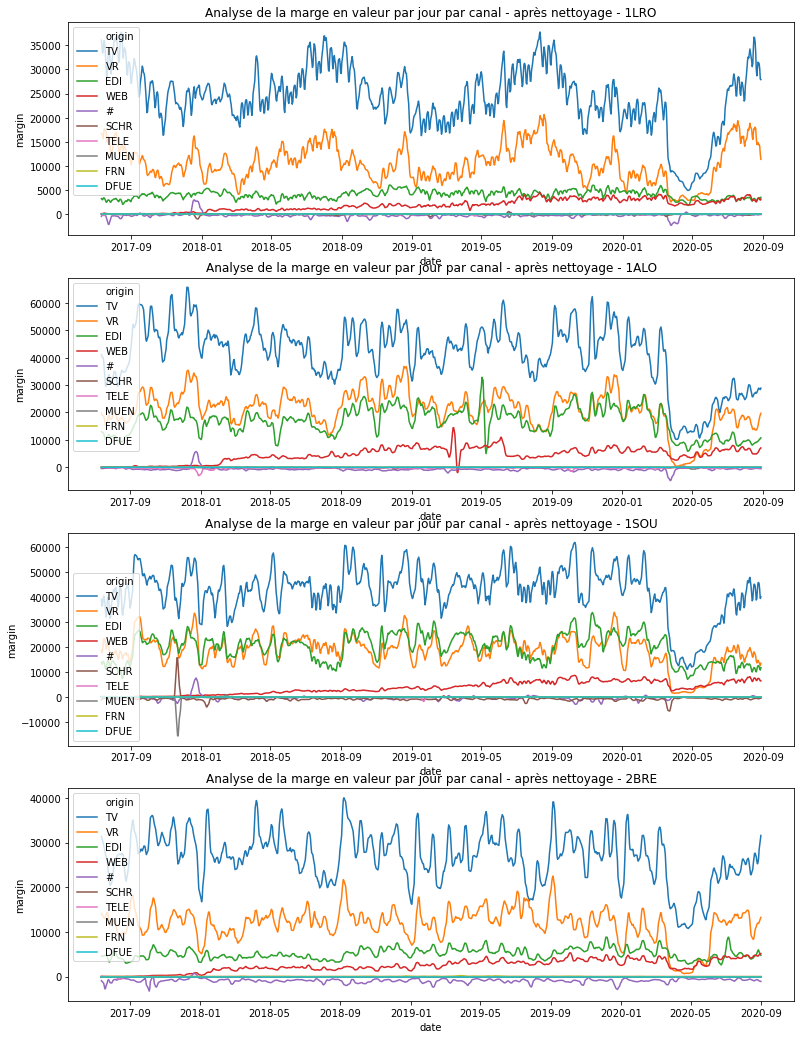

In [39]:
fig, axs = plt.subplots(figsize = (13, 18), nrows=len(data.orgacom.unique()))
data_to_plot = [(
    data.loc[data.orgacom == orgacom]
        .groupby(['date', 'origin'])['margin']
        .sum()
        .unstack('origin')
        .fillna(0.)
        .rolling(10, win_type='triang')
        .mean()
        .stack('origin')
        .rename('margin')
        .reset_index()
) for orgacom in data.orgacom.unique()]

for i, data_ in enumerate(data_to_plot):
    sns.lineplot(data=data_, x='date', y='margin', hue='origin', ax=axs[i])
    axs[i].set_title(f'Analyse de la marge en valeur par jour par canal - après nettoyage - {orgacoms[i]}')


## Affichage des indicateurs par succursale et canal

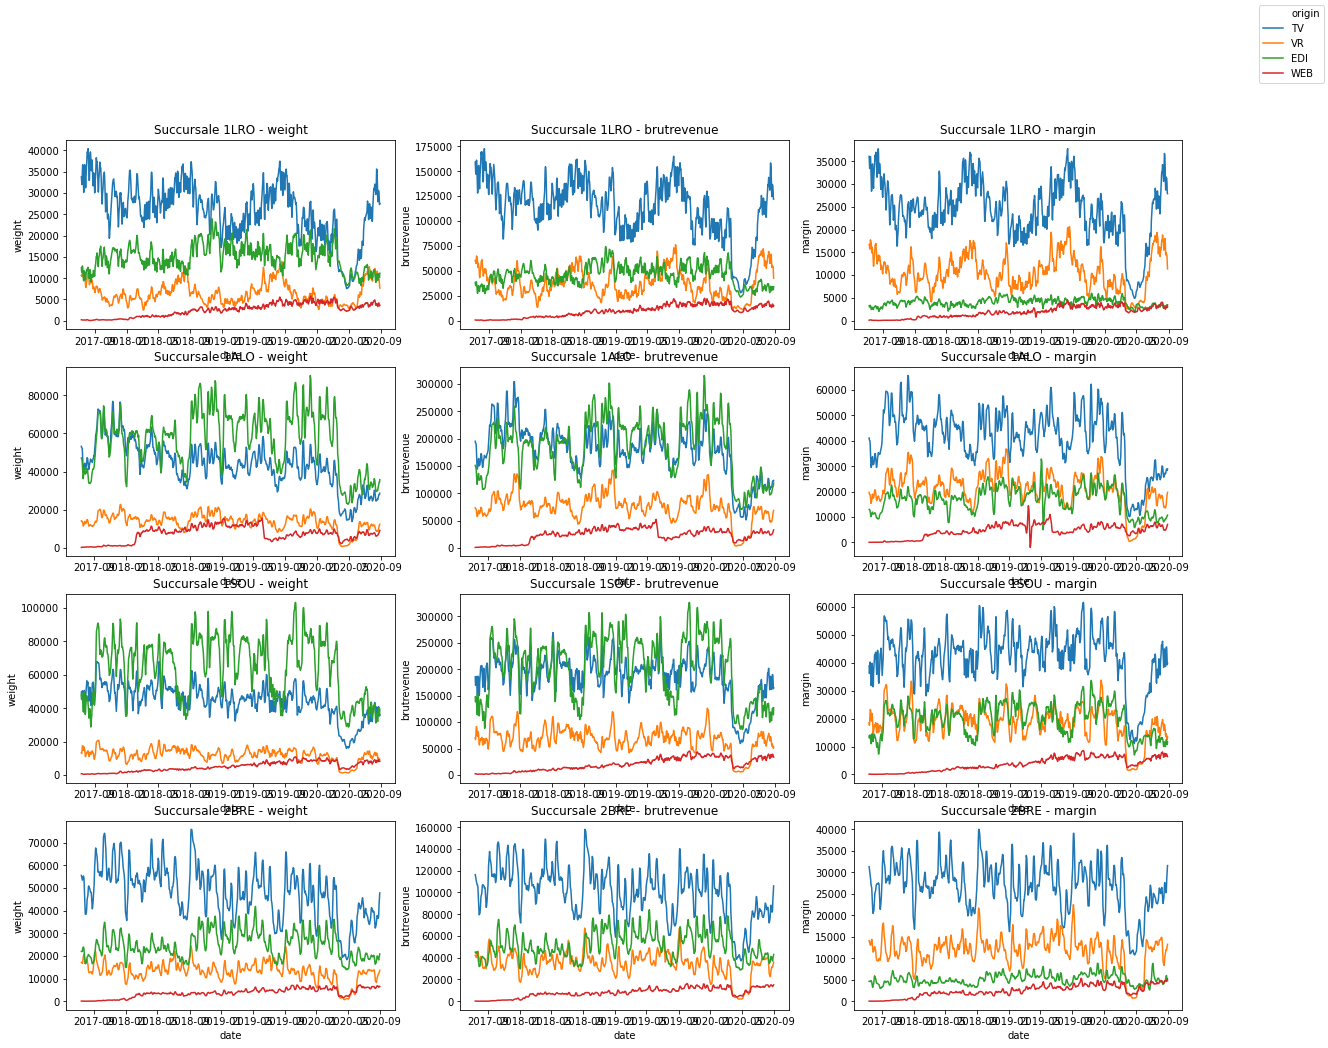

In [40]:
SV = data['orgacom'].unique()
indicators = ['weight', 'brutrevenue', 'margin']
roll_width = 10
win_type = 'triang'
fig, axs = plt.subplots(figsize=(20, 4 * len(SV)), nrows=len(SV), ncols=len(indicators), squeeze=False)
for i, suc in enumerate(SV):
    for j, indicator in enumerate(indicators):
        data_to_plot = (
            data.loc[(data.orgacom == suc) & data.origin.isin(['TV', 'VR', 'WEB', 'EDI'])]
                .groupby(['date', 'origin'], observed=True)[indicator]
                .sum()
                .unstack('origin')
                .fillna(0.)
                .rolling(roll_width, win_type=win_type)
                .mean()
                .stack('origin')
                .rename(indicator)
                .sort_index()
                .reset_index())
        sns.lineplot(data=data_to_plot, x='date', y=indicator, hue='origin', ax=axs[i, j])
        axs[i, j].get_legend().remove()
        axs[i, j].set_title(f'Succursale {suc} - {indicator}')
handles, labels = axs[0, 0].get_legend_handles_labels()
fig.legend(handles, labels)


## Filtration des canaux "exotiques"

In [41]:
boxplot_args = {'showmeans': True, 
                'meanprops': {'markerfacecolor': 'black',
                              'markeredgecolor': 'black',
                              'marker': 's',
                             }
               }

In [42]:
origin2_cat = pd.CategoricalDtype(['TV', 'VR', 'EDI', 'WEB'], ordered=True)
# origins = ['TV', 'VR', 'WEB', 'EDI']
data['origin2'] = data.origin.astype(origin2_cat)

In [43]:
# fig, axs = plt.subplots(figsize=(5, 15), nrows=len(indicators), squeeze=False)
# data_to_plot = data.loc[data.origin.isin(['WEB', 'TV', 'VR', 'EDI']) &
#                         data.doctype.isin(['ZC10'])]
# for j, indicator in enumerate(indicators):
#     sns.boxplot(data=data_to_plot, y=indicator, x='orgacom', hue='origin2', ax=axs[j, 0], showfliers=False, **boxplot_args)
#     axs[j, 0].get_legend().remove()
# handles, labels = axs[0, 0].get_legend_handles_labels()
# fig.legend(handles, labels, loc='center',ncol=4, bbox_to_anchor=(0, 1, 1, 0.12), bbox_transform=axs[0, 0].transAxes, )
# fig.suptitle('Analyse des postes de commandes par canal', fontsize=16, y=.925)

## Affichage des indicateurs par commande

In [44]:
aggfuncs = {
    'margin': 'sum', 
    'brutrevenue': 'sum',
    'weight': 'sum',
    'origin2': 'size',
}
orders = (
    data.loc[(data.doctype == 'ZC10') & (data.weight > 0.) & (data.brutrevenue > 0.)]
        .groupby(['orgacom', 'date', 'client', 'origin2'], observed=True)
        .agg(aggfuncs)
        .rename({'origin2': 'linecount'}, axis=1)
)
print(f'{len(orders)} records in order dataframe before canal deduplication')
orders

2751677 records in order dataframe before canal deduplication


margin  brutrevenue   weight  linecount
orgacom date       client     origin2                                         
1SOU    2017-07-03 0000065940 TV        31.16        84.01    5.501          9
                   0000065945 TV         6.02        23.69    3.734          2
                   0000065975 TV        25.15        97.40   13.718          1
                   0000065998 TV         4.12         8.56    1.000          1
                   0000066014 TV        17.89        48.30    5.000          1
...                                       ...          ...      ...        ...
2BRE    2020-08-31 0000285226 VR         1.38        10.16   10.000          2
                   SL001W     TV        89.34       555.25  180.000          4
                   SL0041     TV        28.42      1470.00    7.200          1
                   SL0075     TV        12.76        95.03   15.615         11
                   SL009N     TV        10.51        75.03   40.500          1

[2751677 rows x 4 columns]

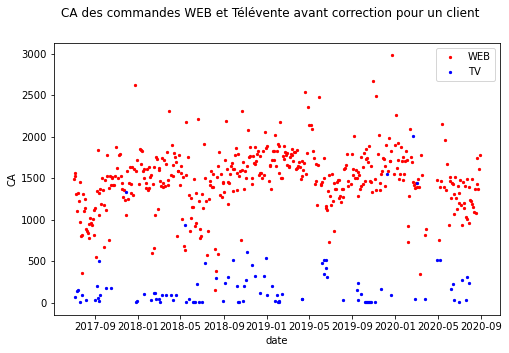

In [45]:
fig, ax = plt.subplots(figsize=(8, 5))
temp = (orders.reset_index()
              .set_index(['orgacom', 'date', 'client', 'origin2'])
              .loc[idx[:, :, '0000200584', :]]
              .reset_index()
       )
ax.scatter(x=temp.loc[temp.origin2 == 'WEB'].date,
           y=temp.loc[temp.origin2 == 'WEB'].brutrevenue,
           color='red',
           s=5.,
           label='WEB')
ax.scatter(x=temp.loc[temp.origin2 == 'TV'].date,
           y=temp.loc[temp.origin2 == 'TV'].brutrevenue,
           color='blue',
           s=5.,
           label='TV')
del(temp)
ax.set_xlabel('date')
ax.set_ylabel('CA')
fig.suptitle('CA des commandes WEB et Télévente avant correction pour un client')
ax.legend()


### Calcul du canal majoritaire par OC, client, jour

On considère le canal de la commande comme étant le canal qui représente le plus en poids pour un jour donné.

In [46]:
major_canal = orders['weight'].unstack(fill_value=0.).idxmax(axis=1).rename('origin2')
major_canal

orgacom  date        client    
1SOU     2017-07-03  0000065940     TV
                     0000065945     TV
                     0000065975     TV
                     0000065998     TV
                     0000066014     TV
                                  ... 
2BRE     2020-08-31  0000282373    EDI
                     0000283953    EDI
                     0000284089     TV
                     0000284540     TV
                     0000284735     VR
Name: origin2, Length: 2444326, dtype: object

In [47]:
orders = orders.groupby(level=[0, 1, 2], observed=True).sum().join(major_canal)
del(major_canal)
order_count = len(orders)
print(f'{order_count} records in order dataframe after canal deduplication')
orders

2444326 records in order dataframe after canal deduplication


margin  brutrevenue   weight  linecount origin2
orgacom date       client                                                     
1SOU    2017-07-03 0000065940   31.16        84.01    5.501          9      TV
                   0000065945    6.02        23.69    3.734          2      TV
                   0000065975   25.15        97.40   13.718          1      TV
                   0000065998    4.12         8.56    1.000          1      TV
                   0000066014   17.89        48.30    5.000          1      TV
...                               ...          ...      ...        ...     ...
2BRE    2020-08-31 0000285226  103.91       433.56   80.455         24      TV
                   SL001W       89.34       555.25  180.000          4      TV
                   SL0041       28.42      1470.00    7.200          1      TV
                   SL0075       12.76        95.03   15.615         11      TV
                   SL009N       10.51        75.03   40.500          1      TV

[2444326 rows x 5 columns]

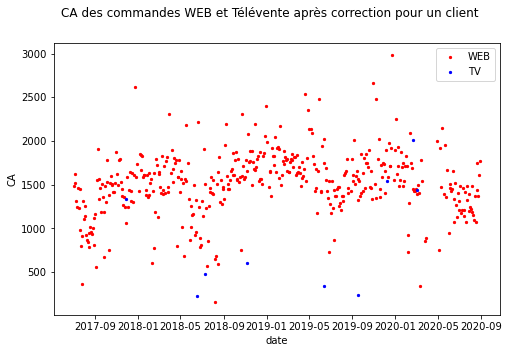

In [48]:
fig, ax = plt.subplots(figsize=(8, 5))
temp = (orders.reset_index()
              .set_index(['orgacom', 'date', 'client', 'origin2'])
              .loc[idx[:, :, '0000200584', :]]
              .reset_index()
       )
ax.scatter(x=temp.loc[temp.origin2 == 'WEB'].date,
           y=temp.loc[temp.origin2 == 'WEB'].brutrevenue,
           color='red',
           s=5.,
           label='WEB')
ax.scatter(x=temp.loc[temp.origin2 == 'TV'].date,
           y=temp.loc[temp.origin2 == 'TV'].brutrevenue,
           color='blue',
           s=5.,
           label='TV')
del(temp)
ax.set_xlabel('date')
ax.set_ylabel('CA')
fig.suptitle('CA des commandes WEB et Télévente après correction pour un client')
ax.legend()


On ajoute quelques données du dataset client.

In [49]:
clt_fields = ['seg1', 'seg2', 'seg3', 'seg4', 'cat', 'sscat', 'hier4']
for field in clt_fields:
    try:
        orders = orders.drop(field)
    except: 
        pass
orders = orders.merge(df_clt.loc[:, clt_fields], left_on=['orgacom', 'client'], right_index=True, validate='m:1')
if len(orders) != order_count:
    raise RuntimeError('Something went wrong when merging orders with client master data!')

In [50]:
orders

margin  brutrevenue   weight  linecount  \
orgacom date       client                                                
1SOU    2017-07-03 0000065940   31.16        84.01    5.501          9   
        2017-08-28 0000065940   44.36       105.93    8.048         10   
        2017-09-08 0000065940   17.60        40.35    3.000          2   
        2017-09-15 0000065940  100.12       236.77   20.312          3   
        2017-09-25 0000065940   96.04       253.99   40.338          5   
...                               ...          ...      ...        ...   
2BRE    2020-08-31 0000282373  177.42      1401.58  488.036         88   
                   0000283953   43.79       421.67  564.980         28   
                   0000284089   89.39       186.75   90.200         12   
                   0000284540  262.04      1252.07  639.326         97   
                   0000284735  319.24       782.56  235.236         58   

                              origin2 seg1 seg2 seg3 seg4 cat sscat  hier4  
orgacom date       client                                                   
1SOU    2017-07-03 0000065940      TV   Z3   Z4   ZI   ZB  ZL   Z13  10897  
        2017-08-28 0000065940      TV   Z3   Z4   ZI   ZB  ZL   Z13  10897  
        2017-09-08 0000065940      TV   Z3   Z4   ZI   ZB  ZL   Z13  10897  
        2017-09-15 0000065940      TV   Z3   Z4   ZI   ZB  ZL   Z13  10897  
        2017-09-25 0000065940      TV   Z3   Z4   ZI   ZB  ZL   Z13  10897  
...                               ...  ...  ...  ...  ...  ..   ...    ...  
2BRE    2020-08-31 0000282373     EDI   Z3   Z4   ZJ   ZF  ZP    ZA  10705  
                   0000283953     EDI   Z3   Z4   ZJ   ZF  ZN   Z19  10506  
                   0000284089      TV   Z3   Z5   ZK   ZG  ZU   Z43    NaN  
                   0000284540      TV   Z3   Z4   ZJ   ZF  ZP    ZA  10432  
                   0000284735      VR   Z3   Z5   ZK   ZG  ZU    ZN    NaN  

[2444326 rows x 12 columns]

In [51]:
orders.merge(df_clt.loc[:, clt_fields],
                      left_on=['orgacom', 'client'],
                      right_index=True,
                      validate='m:1',
                      how='left',
                      indicator=True).loc[lambda x: x._merge != 'both']

Empty DataFrame
Columns: [margin, brutrevenue, weight, linecount, origin2, seg1_x, seg2_x, seg3_x, seg4_x, cat_x, sscat_x, hier4_x, seg1_y, seg2_y, seg3_y, seg4_y, cat_y, sscat_y, hier4_y, _merge]
Index: []

In [52]:
order_count

2444326

In [53]:
len(orders)

2444326

In [121]:
composite_indicators_dict = {
    'PMVK': ['brutrevenue', 'weight'],
    'marginperkg': ['margin', 'weight'],
    'marginpercent': ['margin', 'brutrevenue'],
    'lineweight': ['weight', 'linecount'],
    'PMVK_clt_zscore': ['brutrevenue_clt_zscore', 'weight_clt_zscore'],
    'marginperkg_clt_zscore': ['margin_clt_zscore', 'weight_clt_zscore'],
    'marginpercent_clt_zscore': ['margin_clt_zscore', 'brutrevenue_clt_zscore'],
    'lineweight_clt_zscore': ['weight_clt_zscore', 'linecount_clt_zscore'],
}

for indicator, components in composite_indicators_dict.items():
    try:
        orders[indicator] = orders[components[0]] / orders[components[1]]
    except KeyError:
        pass

orders = orders.reset_index()

Text(0.5, 0.91, 'Analyse des commandes par canal')

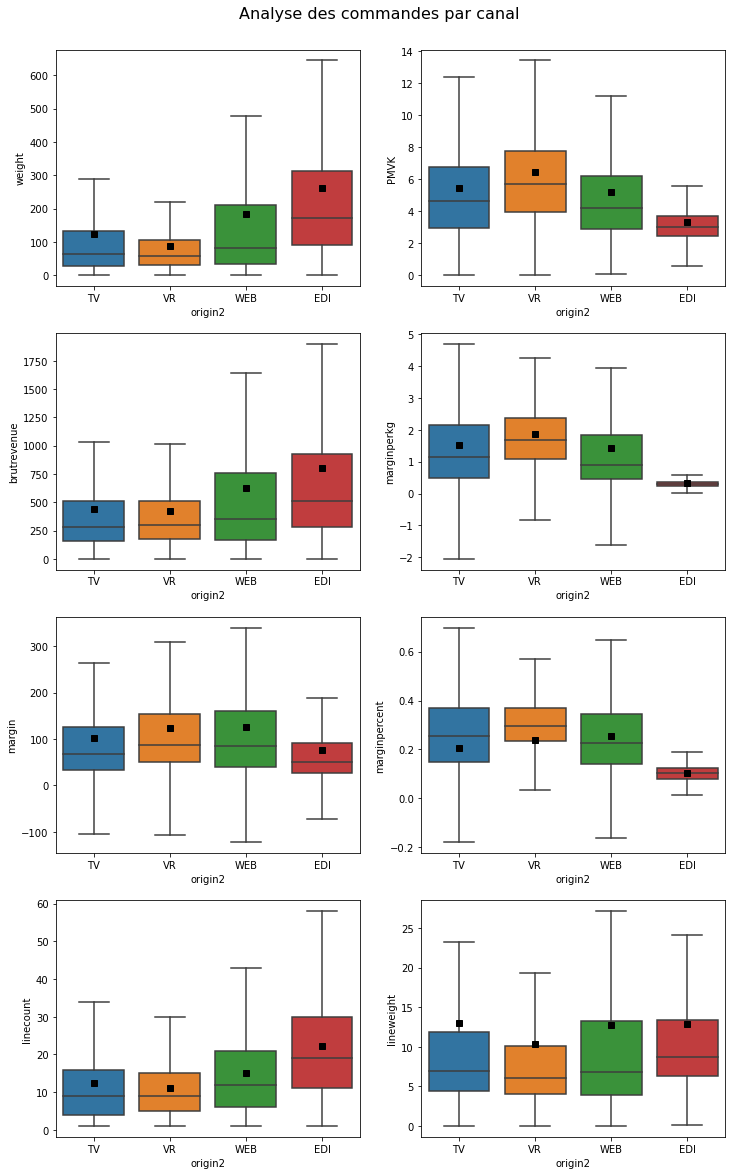

In [55]:
indicators2 = ['weight', 'brutrevenue', 'margin', 'linecount', 'PMVK', 'marginperkg', 'marginpercent', 'lineweight']
fig, axs = plt.subplots(figsize=(12, 20), nrows=len(indicators2) // 2, ncols=2, squeeze=False)
for j, indicator in enumerate(indicators2):
    x, y = j % (len(indicators2) // 2), j // (len(indicators2) // 2)
    sns.boxplot(data=orders, y=indicator, x='origin2', hue=None, ax=axs[x, y], showfliers=False, **boxplot_args)
fig.suptitle('Analyse des commandes par canal', fontsize=16, y=.91)

In [56]:
orders.groupby('origin2').margin.describe()

count        mean         std      min    25%    50%     75%  \
origin2                                                                     
EDI       596597.0   75.469443   98.341545 -5430.55  26.29  50.26   91.52   
TV       1263539.0  103.214684  143.144416 -6435.52  33.53  66.94  125.94   
VR        485707.0  124.219015  141.749354 -2102.62  49.58  87.40  153.39   
WEB        98483.0  125.314285  143.406539  -378.54  39.98  85.30  160.02   

              max  
origin2            
EDI       9880.62  
TV       26866.17  
VR       25151.97  
WEB       6681.78

In [57]:
orders.groupby(['origin2']).mean().loc[:, indicators2].style.format(formats)

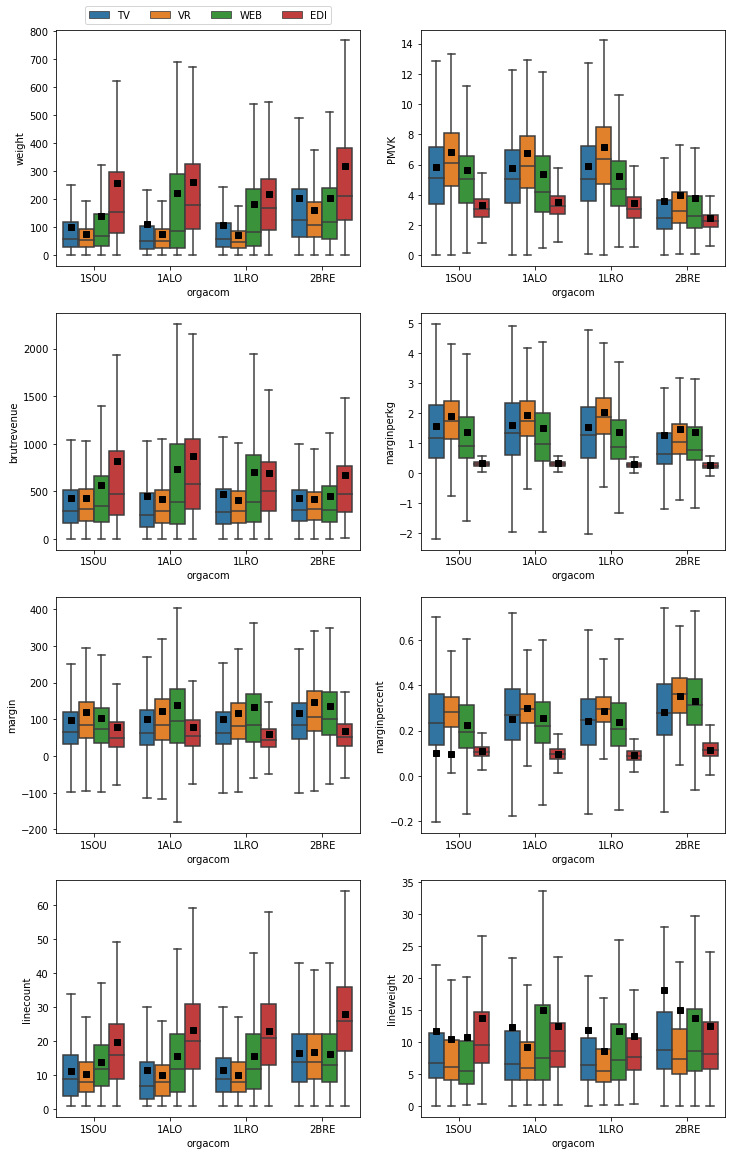

In [58]:
fig, axs = plt.subplots(figsize=(12, 20), nrows=len(indicators2) // 2, ncols=2, squeeze=False)
for j, indicator in enumerate(indicators2):
    x, y = j % (len(indicators2) // 2), j // (len(indicators2) // 2)
    sns.boxplot(data=orders, y=indicator, x='orgacom', hue='origin2', ax=axs[x, y], showfliers=False, **boxplot_args)
    axs[x, y].get_legend().remove()
handles, labels = axs[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc='center',ncol=4, bbox_to_anchor=(0, 1, 1, 0.12), bbox_transform=axs[0, 0].transAxes, )

In [59]:
orders.groupby(['orgacom', 'origin2']).mean().loc[:, indicators2].style.format(formats)

In [60]:
vr_1SOU = orders.loc[(orders.orgacom == '1SOU') & (orders.origin2 == 'VR')]
print(f'{vr_1SOU.loc[(vr_1SOU.marginpercent == vr_1SOU.marginpercent.min())].marginpercent.iloc[0]:.2%}')
vr_1SOU.loc[(vr_1SOU.marginpercent == vr_1SOU.marginpercent.min()), :]

-210400.00%


orgacom       date      client  margin  brutrevenue  weight  linecount  \
3768    1SOU 2019-12-10  0000066228  -42.08         0.02     2.0          1   

     origin2 seg1 seg2 seg3 seg4 cat sscat  hier4  PMVK  marginperkg  \
3768      VR   Z3   Z4   ZI   ZB  ZM   Z16  10838  0.01       -21.04   

      marginpercent  lineweight  
3768        -2104.0         2.0

In [61]:
data.loc[(data.orgacom == '1SOU') &
         (data.client == '0000140169') &
         (data.date == '2019-04-02') &
         (data.origin == 'VR')]

order_num orgacom   month    week       date pricetype      client  \
7685403    1304465    1SOU  201904  201914 2019-04-02       ZTG  0000140169   

        doctype origin salesgroup  ... marginperkg purchcost  purchcostperkg  \
7685403    ZC10     VR        791  ...       -8.56     21.42           8.568   

          PMVK marginpercent _duplicated  margin  brutrevenue  weight  origin2  
7685403  0.004       -2141.0       False  -21.41         0.01     2.5       VR  

[1 rows x 26 columns]

In [62]:
dicted_clt_fields = {key: 'object' for key in clt_fields}

[Text(0, 0, 'ZI - Restau Coll. Autogérée'),
 Text(1, 0, 'ZL - Restau Com. Structurée'),
 Text(2, 0, 'ZK - Restau Com. Indépendante'),
 Text(3, 0, 'ZJ - Restau Coll. Concédée')]

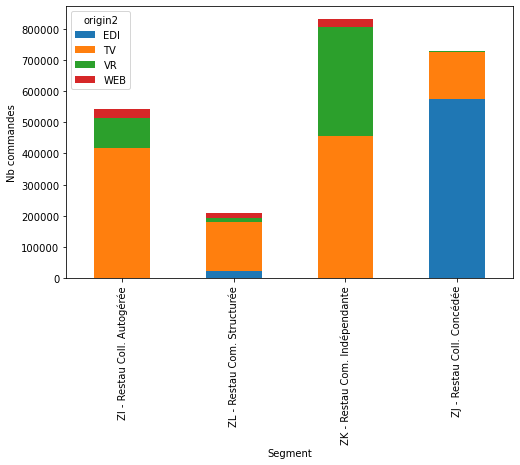

In [63]:
mask_filter = (orders.seg1.isin(['Z3']) & (orders.hier4 != '198863'))

fig, ax = plt.subplots(figsize=(8, 5))
(
orders.loc[mask_filter]
      .pivot_table(index='seg3',
                   columns='origin2',
                   aggfunc='size',
                   observed=True)
      .plot(kind='bar', stacked=True, ax=ax)
)
ax.set_ylabel('Nb commandes')
ax.set_xlabel('Segment')
ax.set_xticklabels(['ZI - Restau Coll. Autogérée',
                    'ZL - Restau Com. Structurée',
                    'ZK - Restau Com. Indépendante', 
                    'ZJ - Restau Coll. Concédée'])
    

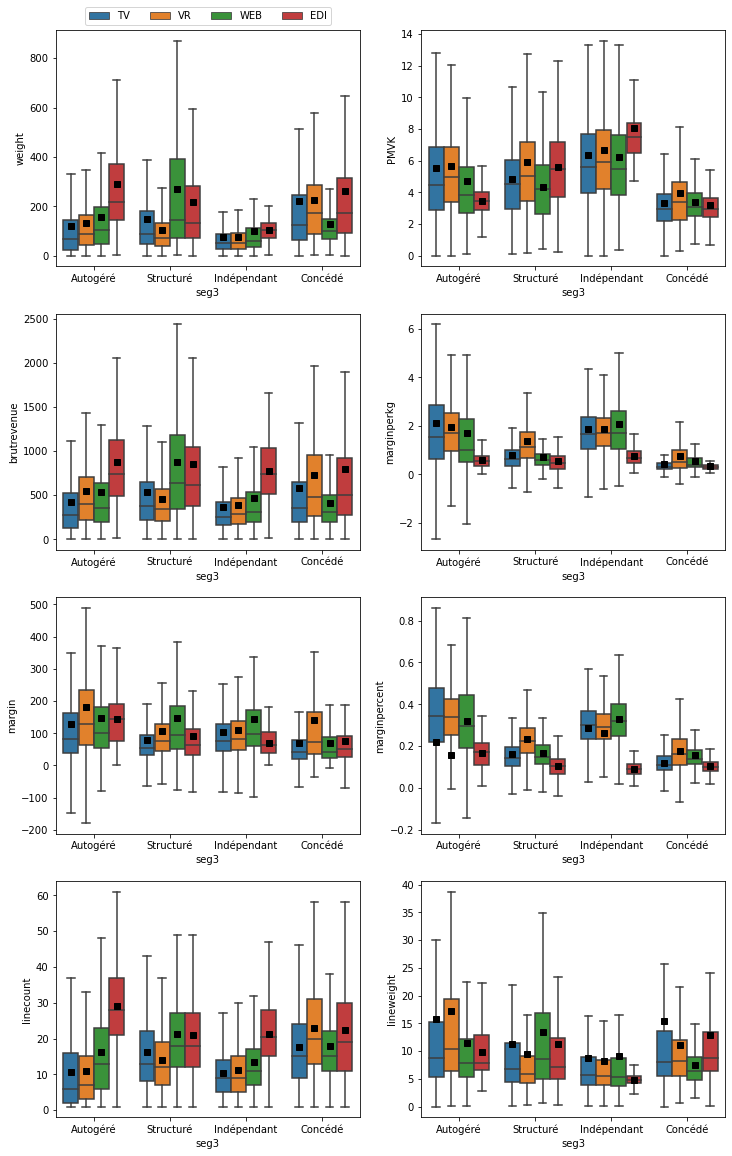

In [64]:
fig, axs = plt.subplots(figsize=(12, 20), nrows=len(indicators2) // 2, ncols=2, squeeze=False)
for j, indicator in enumerate(indicators2):
    x, y = j % (len(indicators2) // 2), j // (len(indicators2) // 2)
    sns.boxplot(data=orders.astype(dicted_clt_fields).loc[mask_filter],
                y=indicator,
                x='seg3',
                hue='origin2',
                ax=axs[x, y],
                showfliers=False, 
                **boxplot_args,
               )
    axs[x, y].get_legend().remove()
    texts = [lib_seg.loc[(3, text.get_text())].iloc[0] for text in axs[x, y].get_xticklabels()]
    axs[x, y].set_xticklabels(texts)
handles, labels = axs[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc='center',ncol=4, bbox_to_anchor=(0, 1, 1, 0.12), bbox_transform=axs[0, 0].transAxes, )

In [65]:
(
orders.loc[orders.seg1.isin(['Z3']), indicators2 + ['orgacom', 'seg3']]
      .groupby(['orgacom', 'seg3'], observed=True)
      .mean()
      .style.format(formats)
)

## Impact du Web sur les indicateurs, à la maille du client

On calcule le zscore sur les indicateurs suivis, **à la maille du client DO**.

In [ ]:
from ..scripts 

In [66]:
def compute_zscores(df, grouper_fields, indicators, suffix='_clt_zscore'):
    grouped = df.groupby(grouper_fields, observed=True)
    for indicator in indicators:
        mean_ds = grouped[indicator].transform('mean')
        std_ds = grouped[indicator].transform('std')
        df[indicator + suffix] = ((df[indicator] - mean_ds) / std_ds).replace([np.inf, -np.inf], np.nan).fillna(0.)
        del(mean_ds)
        del(std_ds)
        print(f'{indicator} done!')
    print('ALL DONE!')

In [67]:
for indicator in indicators2:
    grouped = orders.groupby(['orgacom', 'client'], observed=True)
    orders[indicator + '_clt_mean'] = grouped[indicator].transform('mean')
    orders[indicator + '_clt_std'] = grouped[indicator].transform('std')
    orders[indicator + '_clt_zscore'] = ((orders[indicator] - orders[indicator + '_clt_mean']) /
                                         orders[indicator + '_clt_std']).replace([np.inf, -np.inf], np.nan).fillna(0.)
    del(orders[indicator + '_clt_mean'])
    del(orders[indicator + '_clt_std'])
    print(f'{indicator} done!')
print('ALL DONE!')

weight done!
brutrevenue done!
margin done!
linecount done!
PMVK done!
marginperkg done!
marginpercent done!
lineweight done!
ALL DONE!


In [68]:
orders.describe().style.format('{:.5f}')

Pour un client donné, cela ne change pas le rapport entre les divers indicateurs :

P037276 - YUMURTACI THEO


<AxesSubplot:xlabel='date'>

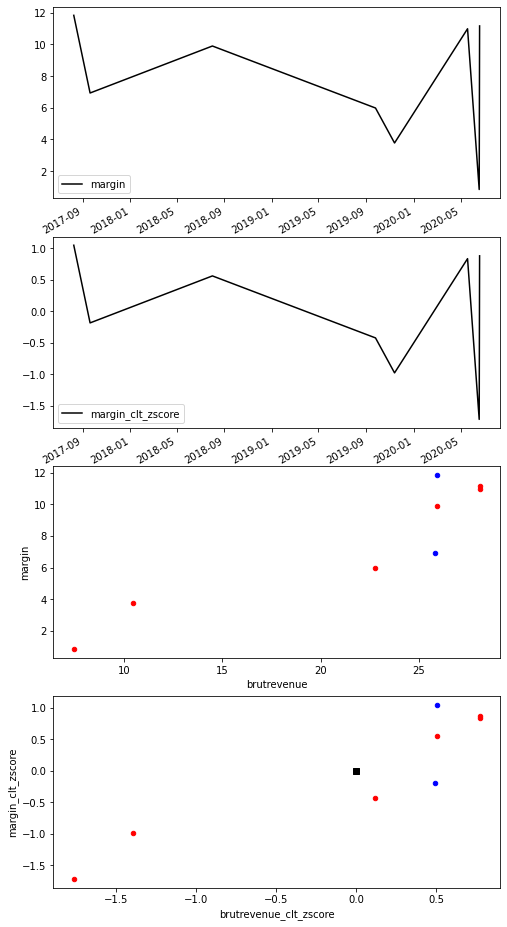

In [69]:
sample = orders.loc[orders.origin2 == 'WEB'].sample(1).iloc[0]
oc, client = sample.orgacom, sample.client
name = df_clt.loc[(oc, client), 'nom']
print(f'{client} - {name}')
fig, axs = plt.subplots(figsize=(8, 18), nrows=4)
mask_clt = (orders.client == client)
mask_web = mask_clt & (orders.origin2 == 'WEB')
mask_other = mask_clt & (orders.origin2 != 'WEB')
orders.loc[mask_web].plot(kind='scatter', y='margin', x='brutrevenue', color='red', ax=axs[2])
orders.loc[mask_other].plot(kind='scatter', y='margin', x='brutrevenue', color='blue', ax=axs[2])
orders.loc[mask_web].plot(kind='scatter', y='margin_clt_zscore', x='brutrevenue_clt_zscore', color='red', ax=axs[3])
orders.loc[mask_other].plot(kind='scatter', y='margin_clt_zscore', x='brutrevenue_clt_zscore', color='blue', ax=axs[3])
axs[3].scatter(x=[0], y=[0], marker='s', color='black')
orders.loc[mask_clt].plot(kind='line', y='margin', x='date', color='black', ax=axs[0])
orders.loc[mask_clt].plot(kind='line', y='margin_clt_zscore', x='date', color='black', ax=axs[1])

### Un exemple issu d'O'Tacos

0000230161 - O TACOS BORDEAUX VICTOIRE


<AxesSubplot:xlabel='date'>

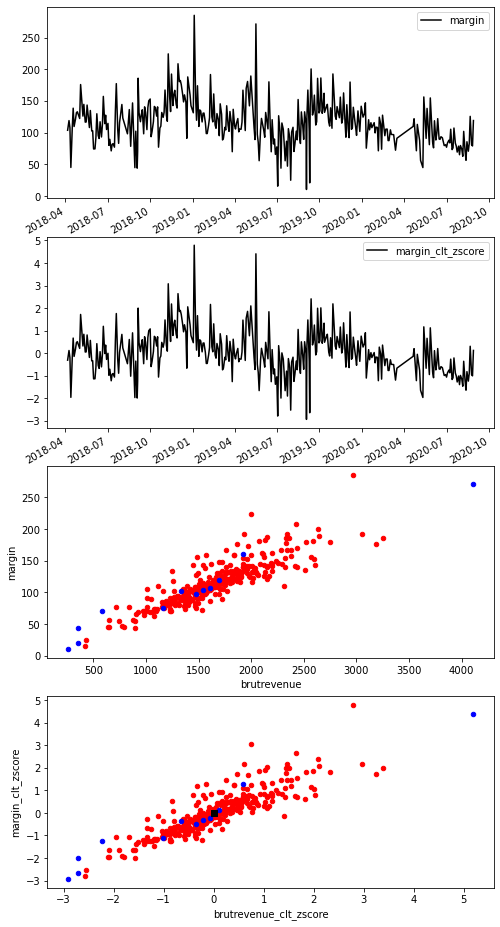

In [70]:
sample = orders.loc[(orders.origin2 == 'WEB') & (orders.hier4 == '198863')].sample(1).iloc[0]
oc, client = sample.orgacom, sample.client
name = df_clt.loc[(oc, client), 'nom']
print(f'{client} - {name}')
fig, axs = plt.subplots(figsize=(8, 18), nrows=4)
mask_clt = (orders.client == client)
mask_web = mask_clt & (orders.origin2 == 'WEB')
mask_other = mask_clt & (orders.origin2 != 'WEB')
orders.loc[mask_web].plot(kind='scatter', y='margin', x='brutrevenue', color='red', ax=axs[2])
orders.loc[mask_other].plot(kind='scatter', y='margin', x='brutrevenue', color='blue', ax=axs[2])
orders.loc[mask_web].plot(kind='scatter', y='margin_clt_zscore', x='brutrevenue_clt_zscore', color='red', ax=axs[3])
orders.loc[mask_other].plot(kind='scatter', y='margin_clt_zscore', x='brutrevenue_clt_zscore', color='blue', ax=axs[3])
axs[3].scatter(x=[0], y=[0], marker='s', color='black')
orders.loc[mask_clt].plot(kind='line', y='margin', x='date', color='black', ax=axs[0])
orders.loc[mask_clt].plot(kind='line', y='margin_clt_zscore', x='date', color='black', ax=axs[1])

Par contre, cela change les indicateurs si 

<AxesSubplot:xlabel='brutrevenue_clt_zscore', ylabel='margin_clt_zscore'>

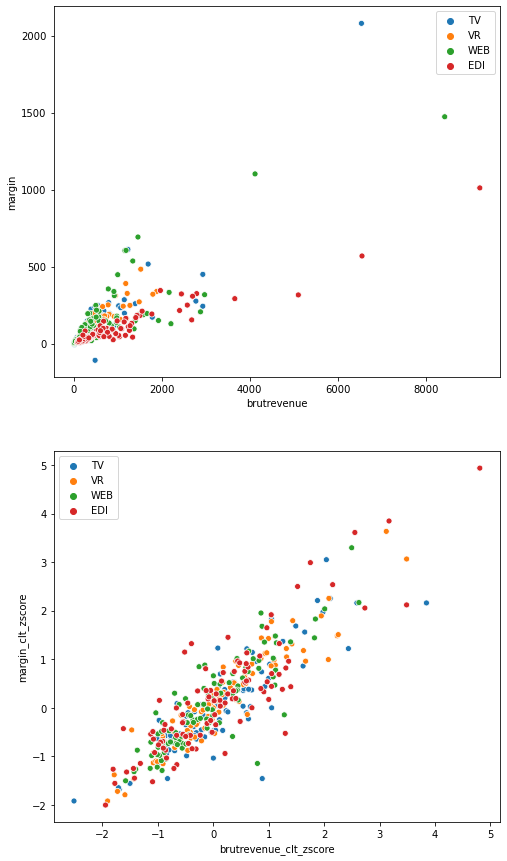

In [71]:
df_sample = pd.concat([orders.loc[orders.origin2 == origin].sample(100) for origin in orders.origin2.unique()], axis=0)

fig, axs = plt.subplots(nrows=2, figsize=(8, 15))
sns.scatterplot(data=df_sample, x='brutrevenue', y='margin', hue=df_sample.origin2.tolist(), ax=axs[0])
sns.scatterplot(data=df_sample, x='brutrevenue_clt_zscore', y='margin_clt_zscore', hue=df_sample.origin2.tolist(), ax=axs[1])

Text(0.5, 0.91, 'Analyse des commandes par canal')

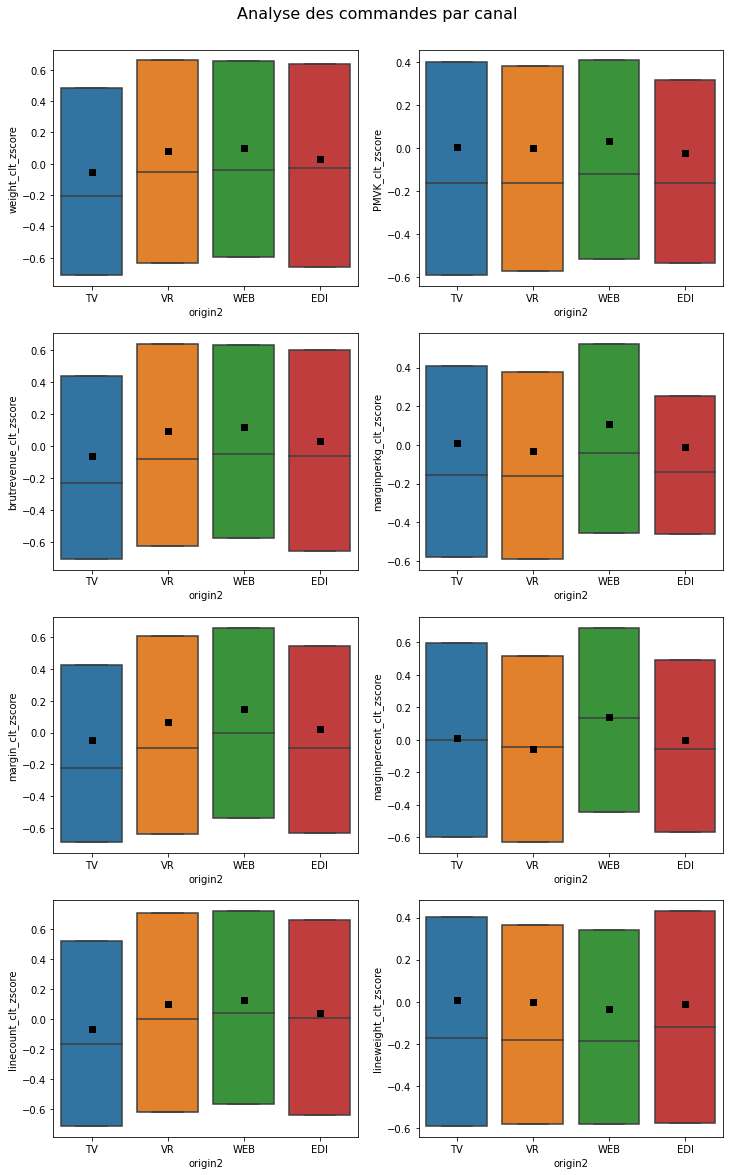

In [72]:
fig, axs = plt.subplots(figsize=(12, 20), nrows=len(indicators2) // 2, ncols=2, squeeze=False)
for j, indicator in enumerate(indicators2):
    x, y = j % (len(indicators2) // 2), j // (len(indicators2) // 2)
    sns.boxplot(data=orders, y=indicator + '_clt_zscore', x='origin2', hue=None, ax=axs[x, y], showfliers=False, whis=0., **boxplot_args)
fig.suptitle('Analyse des commandes par canal', fontsize=16, y=.91)

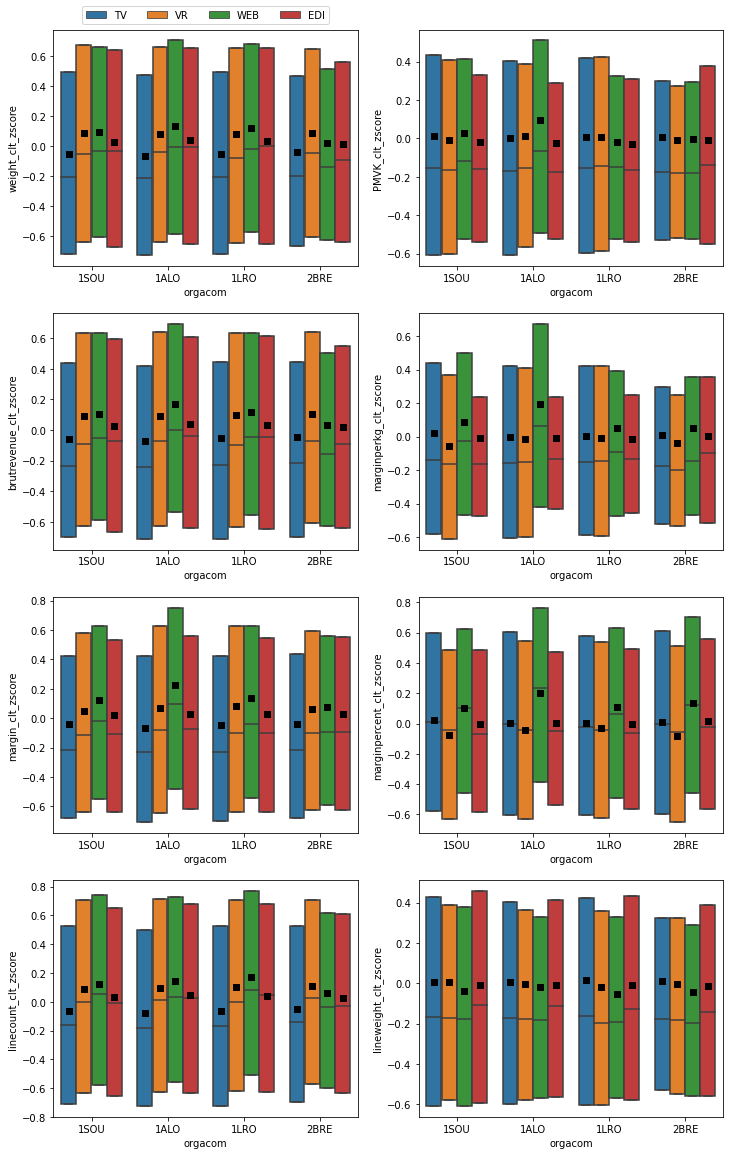

In [73]:
fig, axs = plt.subplots(figsize=(12, 20), nrows=len(indicators2) // 2, ncols=2, squeeze=False)
for j, indicator in enumerate(indicators2):
    x, y = j % (len(indicators2) // 2), j // (len(indicators2) // 2)
    sns.boxplot(data=orders,
                y=indicator + '_clt_zscore',
                x='orgacom',
                hue='origin2',
                ax=axs[x, y],
                showfliers=False,
                whis=0.,
                **boxplot_args,
               )
    axs[x, y].get_legend().remove()
handles, labels = axs[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc='center',ncol=4, bbox_to_anchor=(0, 1, 1, 0.12), bbox_transform=axs[0, 0].transAxes, )

Text(0.5, 1.025, 'Analyse vs. moyenne des commandes par canal et segment de restauration')

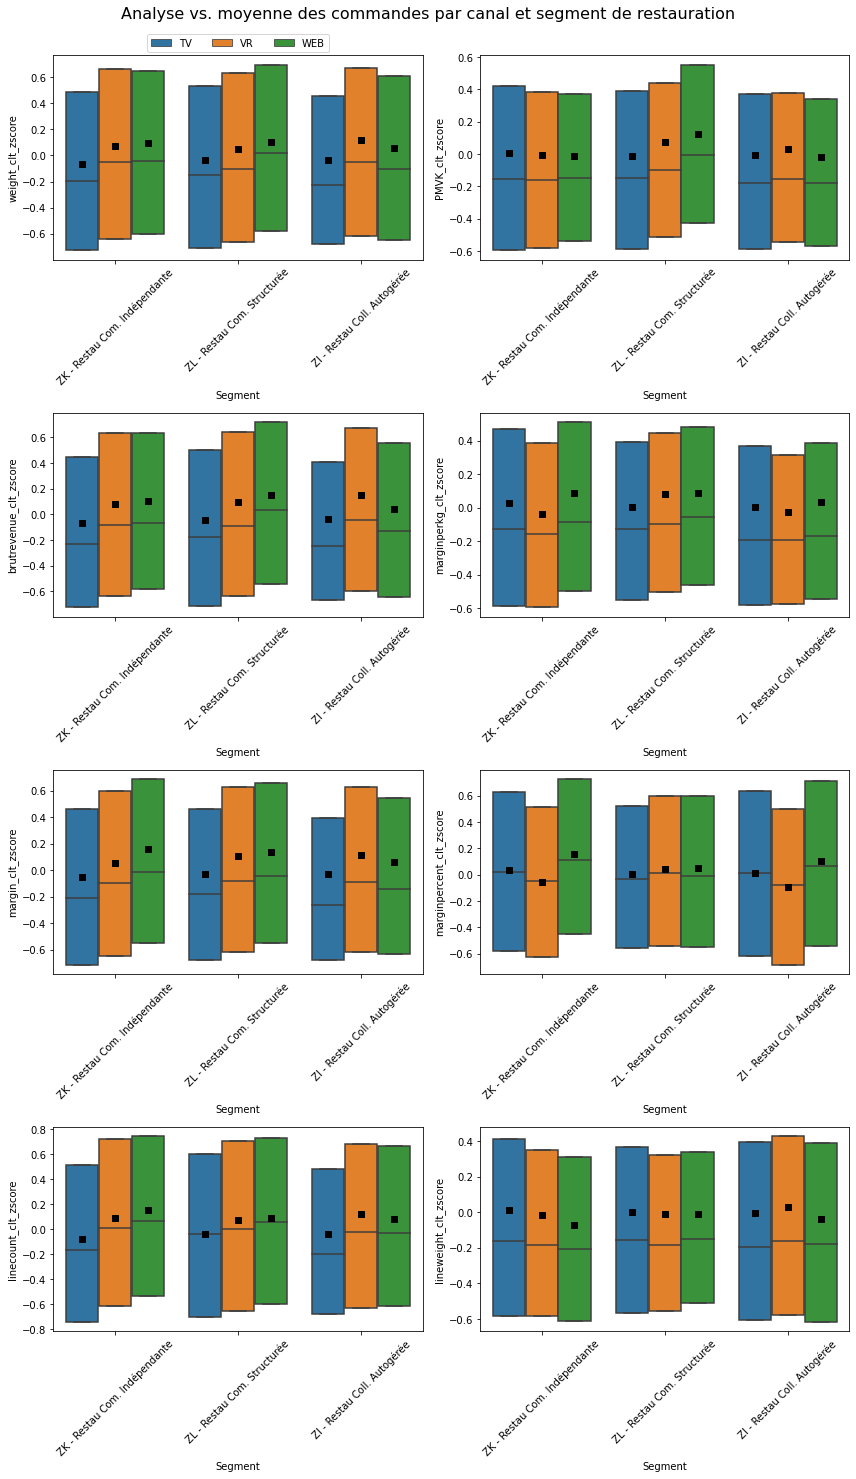

In [74]:
fig, axs = plt.subplots(figsize=(12, 20), nrows=len(indicators2) // 2, ncols=2, squeeze=False)
for j, indicator in enumerate(indicators2):
    x, y = j % (len(indicators2) // 2), j // (len(indicators2) // 2)
    sns.boxplot(data=orders.loc[mask_filter & #.astype(dicted_clt_fields)
                                ~orders.seg3.isin(['ZJ']) &
                                ~orders.origin2.isin(['EDI'])],
                y=indicator + '_clt_zscore',
                x='seg3',
                order=['ZK', 'ZL', 'ZI'],
                hue='origin2',
                hue_order=['TV', 'VR', 'WEB'],
                ax=axs[x, y],
                showfliers=False,
                whis=0.,
                **boxplot_args,
               )
    axs[x, y].get_legend().remove()
    axs[x, y].set_xlabel('Segment')
    axs[x, y].set_xticklabels([
                               'ZK - Restau Com. Indépendante', 
                               'ZL - Restau Com. Structurée',
                               'ZI - Restau Coll. Autogérée',                               
#                                'ZJ - Restau Coll. Concédée',
                              ])
    axs[x, y].xaxis.set_tick_params(rotation=45.)
fig.tight_layout()
handles, labels = axs[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc='center',ncol=4, bbox_to_anchor=(0, 1, 1, 0.12), bbox_transform=axs[0, 0].transAxes, )
fig.suptitle('Analyse vs. moyenne des commandes par canal et segment de restauration', fontsize=16, y=1.025)

## Première modélisation : bascule à la première commande Web

Dans un premier temps, on va considérer que la bascule se fait à la première commande Web. Les hypothèses sont : 
- le statut est initialement le canal de la première commande
- ensuite, il est 'WEB' à partir de la première commande web

On commence par calculer le statut initial de chaque client

In [75]:
try:
    first_order = (
        orders.groupby(['orgacom', 'client'], observed=True)['date']
              .min()
              .reset_index()
        )
except KeyError: 
    orders = orders.reset_index()
    first_order = (
        orders.groupby(['orgacom', 'client'], observed=True)['date']
              .min()
              .reset_index()
        )    

On initialise la table des mises à jour de statuts :

In [76]:
status_updates = (
    orders[['orgacom',
            'client',
            'date',
            'origin2']].merge(first_order,
                              on=['orgacom', 'client', 'date'],
                              how='inner',
                              validate='1:1')
                       .rename({'origin2': 'new_stat'}, axis=1)
                       .set_index(['orgacom', 'client', 'date'])
)

On complète en ajoutant la première commande WEB (si elle n'est pas également la première commande).

In [77]:
status_updates2 = (
orders.loc[orders.origin2 == 'WEB']
      .groupby(['client', 'orgacom'], observed=True)['date']
      .min()
      .reset_index()
      .set_index(['orgacom', 'client', 'date'])
)
status_updates2['new_stat'] = 'WEB'
status_updates = (status_updates.append(status_updates2.loc[~status_updates2.index.isin(status_updates.index)])
                                .sort_values(['orgacom', 'client', 'date'])
                 )
status_updates = status_updates.sort_index()
del(status_updates2)
if len(status_updates.loc[status_updates.index.duplicated(keep=False)]) > 0.:
    raise RuntimeError('Something went wrong in computing statuses!')

In [78]:
status_updates

new_stat
orgacom client     date               
1SOU    0000010078 2017-07-17       TV
                   2017-11-06      WEB
        0000019613 2017-07-04       TV
        0000043428 2017-07-04       TV
        0000043827 2019-07-12       VR
...                                ...
2BRE    SL008B     2017-12-01       TV
        SL008C     2017-07-11       TV
        SL008R     2017-07-28       TV
        SL009N     2017-07-04       TV
        SLD008B    2018-09-14       TV

[37000 rows x 1 columns]

Ajout de 2 lignes de test dans la table des mises à jour de statut.

In [79]:
# status_updates.loc[('1LRO', '0000096476', pd.to_datetime('2018-01-01'))] = 'TEST1'
# status_updates.loc[('1LRO', '0000096476', pd.to_datetime('2019-04-27'))] = 'TEST2'
# status_updates.loc[idx[:, '0000096476', :]]

On rappatrie le statut calculé depuis la tables des mises à jour de statut (`status_updates`) dans la table des commandes (`orders`).

In [80]:
statuses = (
    status_updates.reindex(status_updates.index.union(orders.set_index(['orgacom', 'client', 'date']).index))
                  .sort_index()
                  .fillna(method='ffill')
                  .rename({'new_stat': 'clt_stat'}, axis=1)
)

try:
    del(orders['clt_stat'])
except KeyError:
    pass       

orders2 = (
orders.set_index(['orgacom', 'client', 'date'])
      .merge(statuses, left_index=True, right_index=True, how='left', indicator=True, validate='1:1')
) 
    
if len(orders2.loc[orders2._merge != 'both']) > 0: 
    raise RuntimeError('Something went wrong during statuses computation')
if len(orders2) != len(orders):
    raise RuntimeError('Something went wrong during statuses computation')
orders = orders2
del(statuses)
del(orders['_merge'])

In [81]:
orders.sample(5)

margin  brutrevenue   weight  linecount  \
orgacom client     date                                                  
1ALO    0000110193 2018-05-29  112.69       416.01   69.217         14   
1SOU    0000216357 2019-06-28   18.06       134.79   87.500          4   
1ALO    0000202144 2018-10-17   52.63       219.12   54.060          8   
1LRO    0000062251 2020-03-20   78.10       656.97  305.409         32   
1ALO    0000277332 2020-06-17   44.46       757.83  139.990         18   

                              origin2 seg1 seg2 seg3 seg4 cat  ... lineweight  \
orgacom client     date                                        ...              
1ALO    0000110193 2018-05-29      TV   Z3   Z5   ZK   ZG  ZS  ...   4.944071   
1SOU    0000216357 2019-06-28     EDI   Z3   Z4   ZJ   ZF  ZL  ...  21.875000   
1ALO    0000202144 2018-10-17      TV   Z3   Z5   ZK   ZG  ZU  ...   6.757500   
1LRO    0000062251 2020-03-20     EDI   Z3   Z4   ZJ   ZF  ZL  ...   9.544031   
1ALO    0000277332 2020-06-17      TV   Z3   Z4   ZJ   ZF  ZP  ...   7.777222   

                              weight_clt_zscore  brutrevenue_clt_zscore  \
orgacom client     date                                                   
1ALO    0000110193 2018-05-29          0.157827                1.126344   
1SOU    0000216357 2019-06-28          1.064860               -0.171257   
1ALO    0000202144 2018-10-17         -1.165832               -1.188628   
1LRO    0000062251 2020-03-20          0.444012               -0.123371   
1ALO    0000277332 2020-06-17         -0.551648               -0.004409   

                               margin_clt_zscore  linecount_clt_zscore  \
orgacom client     date                                                  
1ALO    0000110193 2018-05-29           0.941557              0.858954   
1SOU    0000216357 2019-06-28           0.194249              0.038276   
1ALO    0000202144 2018-10-17          -1.145202             -0.254152   
1LRO    0000062251 2020-03-20          -0.027685             -0.292640   
1ALO    0000277332 2020-06-17          -0.633417             -0.189703   

                               PMVK_clt_zscore  marginperkg_clt_zscore  \
orgacom client     date                                                  
1ALO    0000110193 2018-05-29         0.568163                0.510800   
1SOU    0000216357 2019-06-28        -1.021903               -0.396366   
1ALO    0000202144 2018-10-17        -0.483681               -0.172571   
1LRO    0000062251 2020-03-20        -0.277462               -0.122185   
1ALO    0000277332 2020-06-17         0.685701               -0.379946   

                               marginpercent_clt_zscore  \
orgacom client     date                                   
1ALO    0000110193 2018-05-29                 -0.556269   
1SOU    0000216357 2019-06-28                  0.339216   
1ALO    0000202144 2018-10-17                  0.160765   
1LRO    0000062251 2020-03-20                 -0.003675   
1ALO    0000277332 2020-06-17                 -0.915672   

                               lineweight_clt_zscore  clt_stat  
orgacom client     date                                         
1ALO    0000110193 2018-05-29              -0.546727        TV  
1SOU    0000216357 2019-06-28               0.927091       EDI  
1ALO    0000202144 2018-10-17              -0.901909        TV  
1LRO    0000062251 2020-03-20               1.067963       EDI  
1ALO    0000277332 2020-06-17              -0.579701       EDI  

[5 rows x 25 columns]

On rappatrie ensuite de quoi calculer les indicateurs dans la table des mises à jour de statut.

In [82]:
(
orders.groupby(['orgacom', 'client', 'clt_stat'], observed=True)
      .agg({'margin': 'sum',
            'brutrevenue': 'sum', 
            'weight': 'sum', 
            'linecount': 'sum', 
            'origin2': 'size',
           })
      .rename({'origin2': 'ordercount'}, axis=1)
)

margin  brutrevenue      weight  linecount  \
orgacom client     clt_stat                                                 
1SOU    0000010078 TV           11.01        20.82       2.350          2   
                   WEB         221.62       452.95      25.460         18   
        0000019613 TV        47824.80    470059.03  129763.078       5624   
        0000043428 TV        20550.61    107904.93   24274.185       3153   
        0000043827 VR          922.65      4220.09     862.249        116   
...                               ...          ...         ...        ...   
2BRE    SL008B     TV          190.97      4398.58    3303.984          2   
        SL008C     TV         7578.42     71848.30   21946.816        367   
        SL008R     TV          263.63      6992.88    2009.948         43   
        SL009N     TV         5107.84     14556.72    4057.578        172   
        SLD008B    TV            3.82        70.05       4.400          1   

                             ordercount  
orgacom client     clt_stat              
1SOU    0000010078 TV                 1  
                   WEB                6  
        0000019613 TV               485  
        0000043428 TV               163  
        0000043827 VR                 9  
...                                 ...  
2BRE    SL008B     TV                 2  
        SL008C     TV                95  
        SL008R     TV                25  
        SL009N     TV                48  
        SLD008B    TV                 1  

[37000 rows x 5 columns]

In [83]:
status_updates = status_updates.reset_index().set_index(['orgacom', 'client', 'new_stat']).join(
    orders.rename({'clt_stat': 'new_stat'}, axis=1)
          .groupby(['orgacom', 'client', 'new_stat'], observed=True)
          .agg({'margin': 'sum',
                'brutrevenue': 'sum', 
                'weight': 'sum', 
                'linecount': 'sum', 
                'origin2': 'size',
               })
          .rename({'origin2': 'ordercount'}, axis=1)         
)
status_updates

date    margin  brutrevenue      weight  \
orgacom client     new_stat                                                 
1SOU    0000010078 TV       2017-07-17     11.01        20.82       2.350   
                   WEB      2017-11-06    221.62       452.95      25.460   
        0000019613 TV       2017-07-04  47824.80    470059.03  129763.078   
        0000043428 TV       2017-07-04  20550.61    107904.93   24274.185   
        0000043827 VR       2019-07-12    922.65      4220.09     862.249   
...                                ...       ...          ...         ...   
2BRE    SL008B     TV       2017-12-01    190.97      4398.58    3303.984   
        SL008C     TV       2017-07-11   7578.42     71848.30   21946.816   
        SL008R     TV       2017-07-28    263.63      6992.88    2009.948   
        SL009N     TV       2017-07-04   5107.84     14556.72    4057.578   
        SLD008B    TV       2018-09-14      3.82        70.05       4.400   

                             linecount  ordercount  
orgacom client     new_stat                         
1SOU    0000010078 TV                2           1  
                   WEB              18           6  
        0000019613 TV             5624         485  
        0000043428 TV             3153         163  
        0000043827 VR              116           9  
...                                ...         ...  
2BRE    SL008B     TV                2           2  
        SL008C     TV              367          95  
        SL008R     TV               43          25  
        SL009N     TV              172          48  
        SLD008B    TV                1           1  

[37000 rows x 6 columns]

In [84]:
status_updates['PMVK'] = status_updates.brutrevenue / status_updates.weight
status_updates['marginperkg'] = status_updates.margin / status_updates.weight
status_updates['marginpercent'] = status_updates.margin / status_updates.brutrevenue
status_updates['lineweight'] = status_updates.weight / status_updates.linecount
for indicator in ['margin', 'brutrevenue', 'weight', 'linecount']:
    status_updates[indicator] /= status_updates['ordercount']
status_updates = status_updates.reset_index().set_index(['orgacom', 'client', 'date'])
status_updates

new_stat      margin  brutrevenue       weight  \
orgacom client     date                                                        
1SOU    0000010078 2017-07-17       TV   11.010000    20.820000     2.350000   
                   2017-11-06      WEB   36.936667    75.491667     4.243333   
        0000019613 2017-07-04       TV   98.607835   969.193876   267.552738   
        0000043428 2017-07-04       TV  126.077362   661.993436   148.921380   
        0000043827 2019-07-12       VR  102.516667   468.898889    95.805444   
...                                ...         ...          ...          ...   
2BRE    SL008B     2017-12-01       TV   95.485000  2199.290000  1651.992000   
        SL008C     2017-07-11       TV   79.772842   756.297895   231.019116   
        SL008R     2017-07-28       TV   10.545200   279.715200    80.397920   
        SL009N     2017-07-04       TV  106.413333   303.265000    84.532875   
        SLD008B    2018-09-14       TV    3.820000    70.050000     4.400000   

                               linecount  ordercount       PMVK  marginperkg  \
orgacom client     date                                                        
1SOU    0000010078 2017-07-17   2.000000           1   8.859574     4.685106   
                   2017-11-06   3.000000           6  17.790652     8.704635   
        0000019613 2017-07-04  11.595876         485   3.622441     0.368555   
        0000043428 2017-07-04  19.343558         163   4.445254     0.846604   
        0000043827 2019-07-12  12.888889           9   4.894282     1.070051   
...                                  ...         ...        ...          ...   
2BRE    SL008B     2017-12-01   1.000000           2   1.331296     0.057800   
        SL008C     2017-07-11   3.863158          95   3.273746     0.345308   
        SL008R     2017-07-28   1.720000          25   3.479135     0.131163   
        SL009N     2017-07-04   3.583333          48   3.587539     1.258840   
        SLD008B    2018-09-14   1.000000           1  15.920455     0.868182   

                               marginpercent   lineweight  
orgacom client     date                                    
1SOU    0000010078 2017-07-17       0.528818     1.175000  
                   2017-11-06       0.489281     1.414444  
        0000019613 2017-07-04       0.101742    23.073094  
        0000043428 2017-07-04       0.190451     7.698758  
        0000043827 2019-07-12       0.218633     7.433181  
...                                      ...          ...  
2BRE    SL008B     2017-12-01       0.043416  1651.992000  
        SL008C     2017-07-11       0.105478    59.800589  
        SL008R     2017-07-28       0.037700    46.742977  
        SL009N     2017-07-04       0.350892    23.590570  
        SLD008B    2018-09-14       0.054532     4.400000  

[37000 rows x 10 columns]

In [85]:
orders

margin  brutrevenue   weight  linecount  \
orgacom client     date                                                  
1SOU    0000065940 2017-07-03   31.16        84.01    5.501          9   
                   2017-08-28   44.36       105.93    8.048         10   
                   2017-09-08   17.60        40.35    3.000          2   
                   2017-09-15  100.12       236.77   20.312          3   
                   2017-09-25   96.04       253.99   40.338          5   
...                               ...          ...      ...        ...   
2BRE    0000282373 2020-08-31  177.42      1401.58  488.036         88   
        0000283953 2020-08-31   43.79       421.67  564.980         28   
        0000284089 2020-08-31   89.39       186.75   90.200         12   
        0000284540 2020-08-31  262.04      1252.07  639.326         97   
        0000284735 2020-08-31  319.24       782.56  235.236         58   

                              origin2 seg1 seg2 seg3 seg4 cat  ... lineweight  \
orgacom client     date                                        ...              
1SOU    0000065940 2017-07-03      TV   Z3   Z4   ZI   ZB  ZL  ...   0.611222   
                   2017-08-28      TV   Z3   Z4   ZI   ZB  ZL  ...   0.804800   
                   2017-09-08      TV   Z3   Z4   ZI   ZB  ZL  ...   1.500000   
                   2017-09-15      TV   Z3   Z4   ZI   ZB  ZL  ...   6.770667   
                   2017-09-25      TV   Z3   Z4   ZI   ZB  ZL  ...   8.067600   
...                               ...  ...  ...  ...  ...  ..  ...        ...   
2BRE    0000282373 2020-08-31     EDI   Z3   Z4   ZJ   ZF  ZP  ...   5.545864   
        0000283953 2020-08-31     EDI   Z3   Z4   ZJ   ZF  ZN  ...  20.177857   
        0000284089 2020-08-31      TV   Z3   Z5   ZK   ZG  ZU  ...   7.516667   
        0000284540 2020-08-31      TV   Z3   Z4   ZJ   ZF  ZP  ...   6.590990   
        0000284735 2020-08-31      VR   Z3   Z5   ZK   ZG  ZU  ...   4.055793   

                              weight_clt_zscore  brutrevenue_clt_zscore  \
orgacom client     date                                                   
1SOU    0000065940 2017-07-03         -0.530799               -0.420589   
                   2017-08-28         -0.480297               -0.376466   
                   2017-09-08         -0.580390               -0.508474   
                   2017-09-15         -0.237125               -0.113095   
                   2017-09-25          0.159954               -0.078432   
...                                         ...                     ...   
2BRE    0000282373 2020-08-31          0.000000                0.000000   
        0000283953 2020-08-31          0.000000                0.000000   
        0000284089 2020-08-31          0.000000                0.000000   
        0000284540 2020-08-31          0.000000                0.000000   
        0000284735 2020-08-31          0.000000                0.000000   

                               margin_clt_zscore  linecount_clt_zscore  \
orgacom client     date                                                  
1SOU    0000065940 2017-07-03          -0.515855              2.795673   
                   2017-08-28          -0.423595              3.252761   
                   2017-09-08          -0.610631             -0.403938   
                   2017-09-15          -0.033868              0.053150   
                   2017-09-25          -0.062385              0.967324   
...                                          ...                   ...   
2BRE    0000282373 2020-08-31           0.000000              0.000000   
        0000283953 2020-08-31           0.000000              0.000000   
        0000284089 2020-08-31           0.000000              0.000000   
        0000284540 2020-08-31           0.000000              0.000000   
        0000284735 2020-08-31           0.000000              0.000000   

                               PMVK_clt_zscore  marginperkg_clt_zscore  \
o

In [86]:
compute_zscores(status_updates, ['orgacom', 'client'], indicators2)

weight done!
brutrevenue done!
margin done!
linecount done!
PMVK done!
marginperkg done!
marginpercent done!
lineweight done!
ALL DONE!


Text(0.5, 1.025, 'Comparatif des différentes avant/après la première commande WEB')

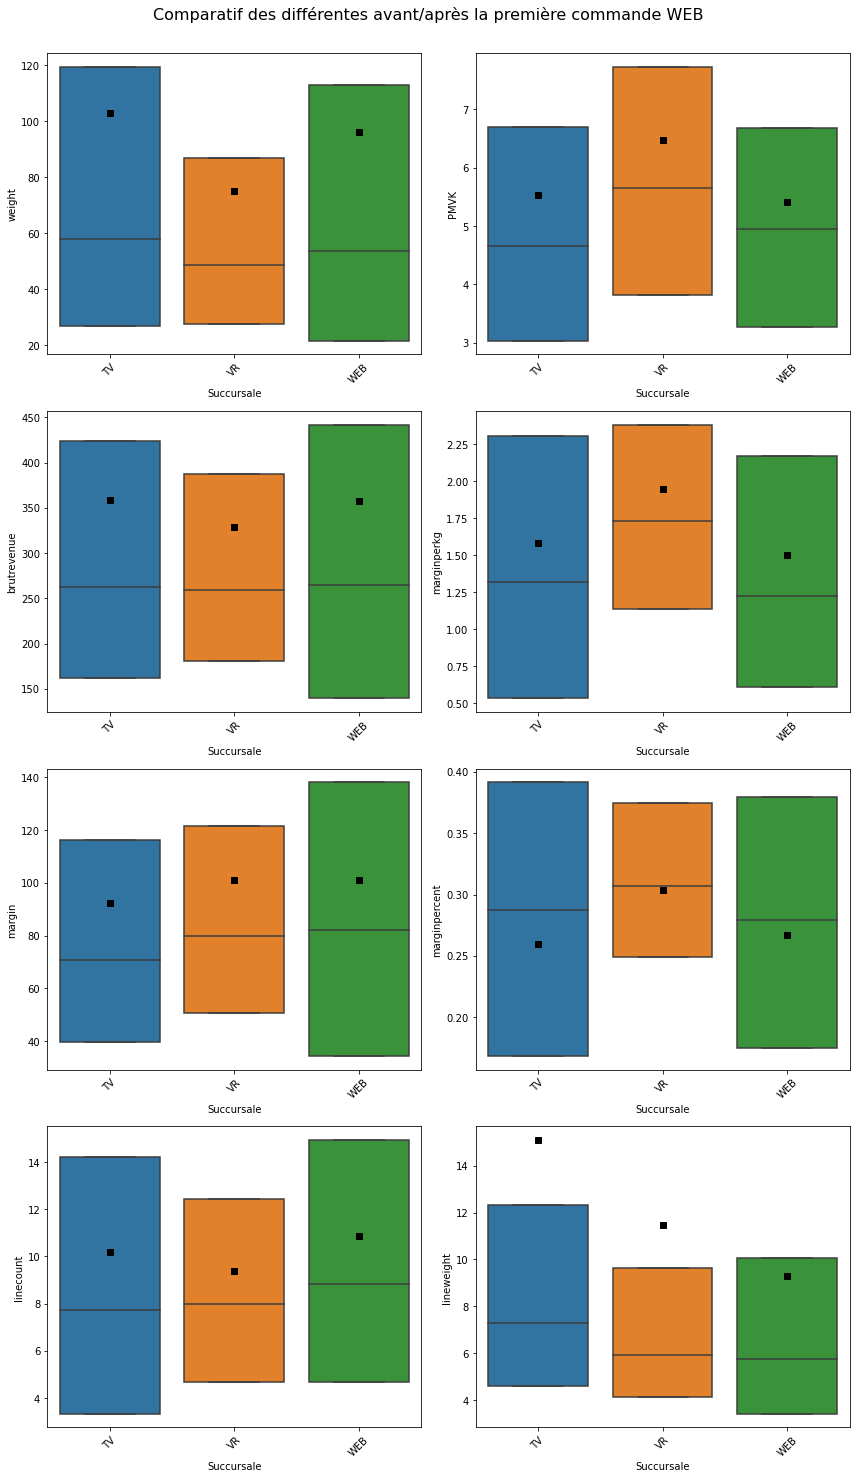

In [87]:
fig, axs = plt.subplots(figsize=(12, 20), nrows=len(indicators2) // 2, ncols=2, squeeze=False)
for j, indicator in enumerate(indicators2):
    x, y = j % (len(indicators2) // 2), j // (len(indicators2) // 2)
    sns.boxplot(data=status_updates.reset_index(),
                y=indicator,
                x='new_stat',
                order=['TV', 'VR', 'WEB'],
#                 hue='new_stat',
#                 hue_order=['TV', 'VR', 'WEB'],
                ax=axs[x, y],
                showfliers=False,
                whis=0.,
                **boxplot_args,
               )
#     axs[x, y].get_legend().remove()
    axs[x, y].set_xlabel('Succursale')
#     axs[x, y].set_xticklabels([
#                                'ZK - Restau Com. Indépendante', 
#                                'ZL - Restau Com. Structurée',
#                                'ZI - Restau Coll. Autogérée',                               
#                                'ZJ - Restau Coll. Concédée',
#                               ])
    axs[x, y].xaxis.set_tick_params(rotation=45.)
fig.tight_layout()
# handles, labels = axs[0, 0].get_legend_handles_labels()
# fig.legend(handles, labels, loc='center',ncol=4, bbox_to_anchor=(0, 1, 1, 0.12), bbox_transform=axs[0, 0].transAxes, )
fig.suptitle('Comparatif des différentes avant/après la première commande WEB', fontsize=16, y=1.025)

In [88]:
def compute_distribution(data=None,
                         indicators=None,
                         x=None,
                         hue=None,
                         percentile_selection=.99, 
                         IQR_factor_selection=3.,
                         IQR_factor_plot=1.5,
                        ):
    lev_count = 1
    if x and hue:
        data = data.groupby([x, hue])
        lev_count = 3
    elif x:
        data = data.groupby(x)
        lev_count = 2
    lev_order = list(range(lev_count))
    lev_order = lev_order[-1:] + lev_order[:-1]
    
    stats = (data[indicators].describe(percentiles=[1 - percentile_selection, .25, .50, .75, percentile_selection])
                             .T
                             .unstack(0)
                             .reorder_levels(lev_order, axis=1)
                             .sort_index(axis=1)
            )
#     print(stats)
    # IQR = interquartile range (brute)
    stats.loc['IQR'] = stats.iloc[7] - stats.iloc[5]
    # minimum_selection => le "minimum" au sens de 1er quartile - IQR * facteur de sélection
    stats.loc['minimum_selection'] = stats.iloc[5] - IQR_factor_selection * stats.loc['IQR']
    # maximum_selection => le "maximum" au sens de 3eme quartile + IQR * facteur de sélection
    stats.loc['maximum_selection'] = stats.iloc[7] + IQR_factor_selection * stats.loc['IQR']
    # min_plot_selection, max_plot_selection => on prend au plus large entre la percentile selection et l'IQR selection
    stats.loc['min_plot_selection'] = stats.iloc[[4, 11]].min()
    stats.loc['max_plot_selection'] = stats.iloc[[8, 12]].max()
    # max_plot_range, min_plot_range => pour tracer les violons, uniquement de l'affichage
    stats.loc['minimum_plot_range'] = stats.iloc[5] - IQR_factor_plot * stats.loc['IQR']
    stats.loc['maximum_plot_range'] = stats.iloc[7] + IQR_factor_plot * stats.loc['IQR']
    return(stats)

In [89]:
compute_distribution(data=status_updates,
                     indicators=['margin', 'weight'],
                     x='orgacom',
                     hue='new_stat',
                     percentile_selection=.99,
                     IQR_factor_selection=3.,
                     IQR_factor_plot=.5,
                    )

margin                                          \
orgacom                    1SOU                                           
new_stat                    EDI            TV           VR          WEB   
count               1564.000000   5202.000000  4082.000000  1397.000000   
mean                  66.017539     88.447238    93.907605    92.729859   
std                   65.825914    218.474373   104.592457    86.370588   
min                  -75.420000  -1085.470000  -215.930000   -26.007500   
1%                     2.356433    -12.189789     4.965400    -5.485615   
25%                   27.034896     37.430056    48.101215    35.550769   
50%                   48.186722     66.171722    74.251871    74.841750   
75%                   82.603124    108.142283   111.513196   124.750826   
99%                  334.706923    412.787490   369.423670   395.709332   
max                  797.931590  14473.235000  3707.830000   751.190645   
IQR                   55.568228     70.712227    63.411981    89.200056   
minimum_selection   -139.669789   -174.706624  -142.134728  -232.049400   
maximum_selection    249.307810    320.278963   301.749140   392.350995   
min_plot_selection  -139.669789   -174.706624  -142.134728  -232.049400   
max_plot_selection   334.706923    412.787490   369.423670   395.709332   
minimum_plot_range    -0.749218      2.073943    16.395225    -9.049259   
maximum_plot_range   110.387239    143.498396   143.219187   169.350854   

                                                                        \
orgacom                    1ALO                                          
new_stat                    EDI           TV           VR          WEB   
count               1058.000000  4143.000000  2659.000000  1196.000000   
mean                  71.631573    81.772914    93.424392    97.179068   
std                  117.493673   108.772024    92.405750   108.207226   
min                   -9.692671 -2387.110000  -267.620000   -45.222778   
1%                     4.998916   -28.691600     3.382300   -16.442891   
25%                   33.491582    33.453362    45.180705    15.301646   
50%                   53.908025    62.634891    71.080000    71.339091   
75%                   85.613314   108.260277   113.269035   139.056328   
99%                  281.497085   386.258237   410.893251   507.332548   
max                 3408.550000  3334.533333  1902.180000   811.530000   
IQR                   52.121732    74.806915    68.088330   123.754681   
minimum_selection   -122.873612  -190.967383  -159.084285  -355.962398   
maximum_selection    241.978508   332.681022   317.534025   510.320372   
min_plot_selection  -122.873612  -190.967383  -159.084285  -355.962398   
max_plot_selection   281.497085   386.258237   410.893251   510.320372   
minimum_plot_range     7.430717    -3.950095    11.136540   -46.575694   
maximum_plot_range   111.674180   145.663735   147.313200   200.933669   

                                              ...       weight               \
orgacom                   1LRO                ...         1ALO                
new_stat                   EDI            TV  ...           VR          WEB   
count               433.000000   2950.000000  ...  2659.000000  1196.000000   
mean                 52.220076     89.117826  ...    56.475991    93.039765   
std                  39.330893    218.016110  ...    71.735054   165.310565   
min                  -6.840000   -869.730000  ...     0.775800     0.640000   
1%                    3.787801     -1.799076  ...     4.408570     2.875733   
25%                  27.659969     36.674184  ...    23.947288    13.542429   
50%                  44.205769     65.430396  ...    40.210357    40.179503   
75%                  65.344835    106.232498  ...    67.851408    89.112247   
99%                 189.731323    414.096287  ...   268.931025   829.642890   
max                 347.180638  10279.682500  ...  2000.000000  1989.641760   
IQR             

In [90]:
show_mean = {
    'weight': True,
    'brutrevenue': True,
    'margin': True,
    'linecount': True,
    'PMVK': False,
    'marginperkg': False,
    'marginpercent': False,
    'lineweight': False,    
    'weight_clt_zscore': True,
    'brutrevenue_clt_zscore': True,
    'margin_clt_zscore': True,
    'linecount_clt_zscore': True,
    'PMVK_clt_zscore': False,
    'marginperkg_clt_zscore': False,
    'marginpercent_clt_zscore': False,
    'lineweight_clt_zscore': False,        
}

In [91]:
libs = {
    'weight': 'Poids (kg)',
    'brutrevenue': 'CA brut (€)',
    'margin': 'Marge en valeur (€)',
    'linecount': 'Nombre de lignes à la commande',
    'PMVK': 'PMVK (€/kg)',
    'marginperkg': 'Marge au kilo (€/kg)',
    'marginpercent': 'Marge pourcent (%)',
    'lineweight': 'Poids moyen de la ligne (kg)',    
    'weight_clt_zscore': 'Poids - zscore',
    'brutrevenue_clt_zscore': 'CA brut - zscore',
    'margin_clt_zscore': 'Marge en valeur - zscore',
    'linecount_clt_zscore': 'Nombre de lignes à la commande - zscore',
    'PMVK_clt_zscore': 'PMVK - zscore',
    'marginperkg_clt_zscore': 'Marge au kilo - zscore',
    'marginpercent_clt_zscore': 'Marge pourcent - zscore',
    'lineweight_clt_zscore': 'Poids moyen de la ligne - zscore',   
}

In [92]:
orders.columns

Index(['margin', 'brutrevenue', 'weight', 'linecount', 'origin2', 'seg1',
       'seg2', 'seg3', 'seg4', 'cat', 'sscat', 'hier4', 'PMVK', 'marginperkg',
       'marginpercent', 'lineweight', 'weight_clt_zscore',
       'brutrevenue_clt_zscore', 'margin_clt_zscore', 'linecount_clt_zscore',
       'PMVK_clt_zscore', 'marginperkg_clt_zscore', 'marginpercent_clt_zscore',
       'lineweight_clt_zscore', 'clt_stat'],
      dtype='object')

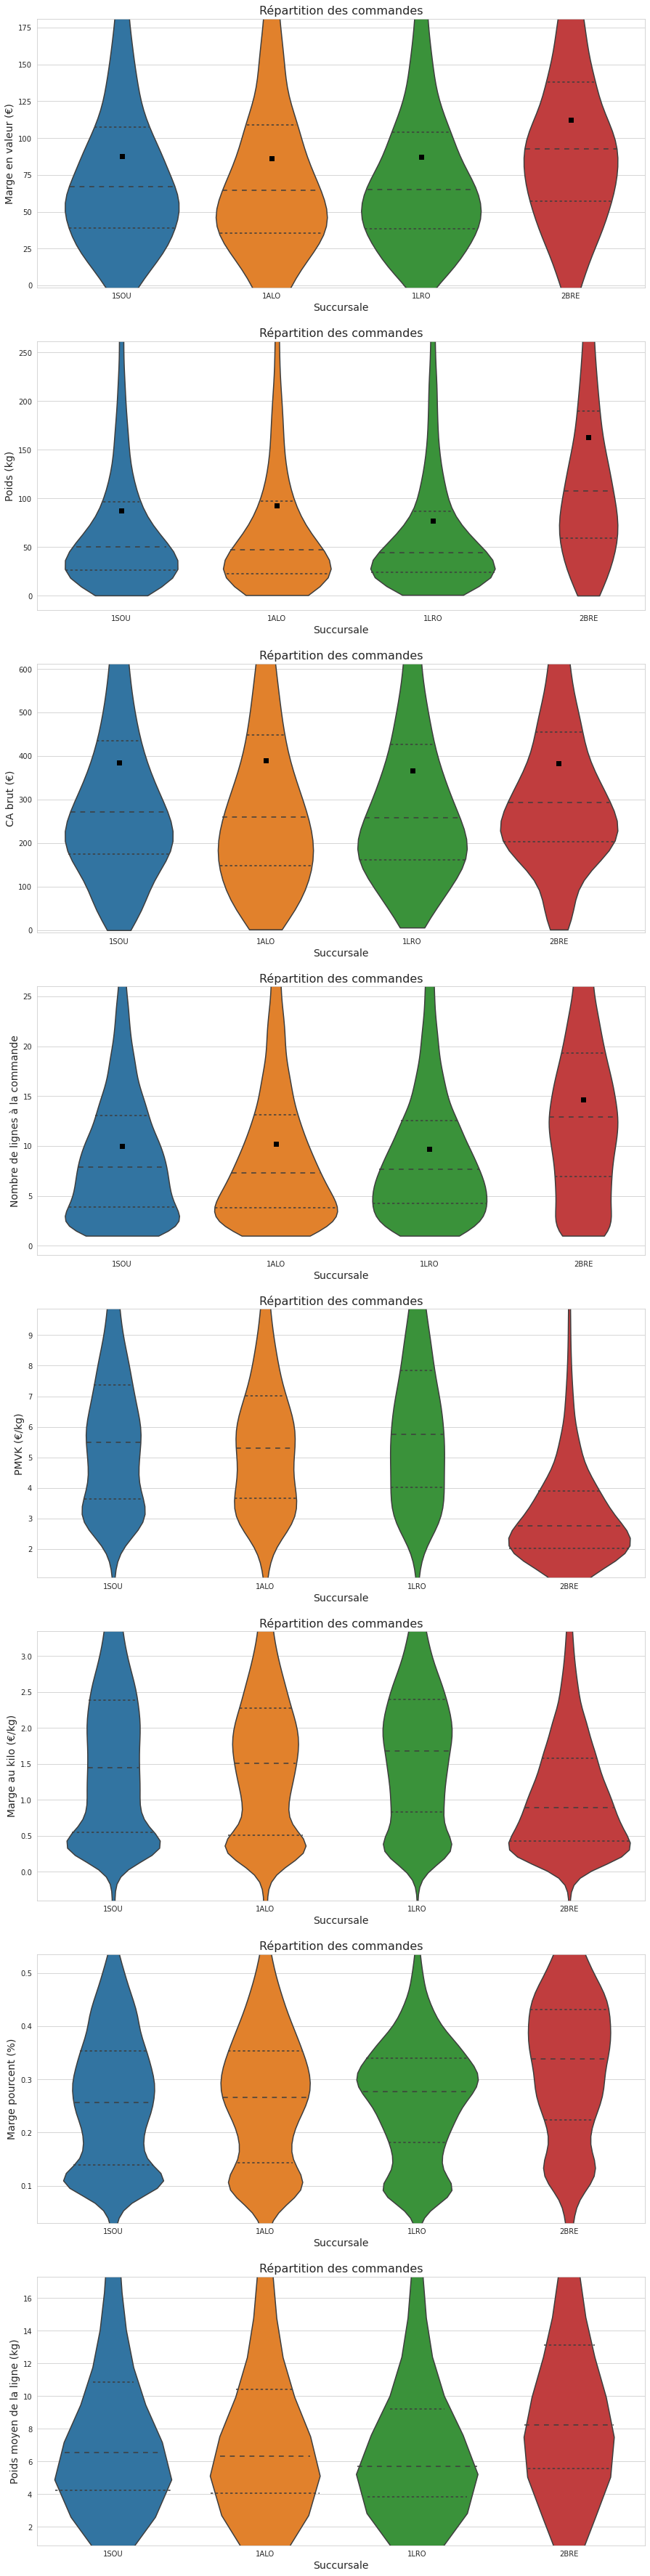

In [93]:
sns.set_style(style="whitegrid")

indicators = ['margin', 'weight', 'brutrevenue', 'linecount', 'PMVK', 'marginperkg', 'marginpercent', 'lineweight']
# indicators = ['weight', 'brutrevenue']
x = 'orgacom'
hue = None #'new_stat'
fig, axs = plt.subplots(nrows=len(indicators), figsize=(15 , 8* len(indicators)), )
stats = compute_distribution(data=status_updates,
                             indicators=indicators,
                             x=x,
                             hue=hue,
                             percentile_selection=.99,
                             IQR_factor_selection=2.,
                             IQR_factor_plot=.5,
                            )
plot_ranges = stats.T.groupby(level=0, axis=0).agg({'min_plot_selection': 'min',
                                                    'max_plot_selection': 'max',
                                                    'minimum_plot_range': 'min',
                                                    'maximum_plot_range': 'max',
                                                   })
reset = status_updates.reset_index()
for i, indicator in enumerate(indicators):
    sns.violinplot(data=(reset.loc[(reset[indicator] >= plot_ranges.loc[indicator, 'min_plot_selection']) &
                                   (reset[indicator] <= plot_ranges.loc[indicator, 'max_plot_selection'])
                                  ]),
                   y=indicator,
                   x=x,
                   cut=0.,
                   hue=hue,
#                    scale='count',
                   inner='quartile',
                   ax=axs[i])
    axs[i].set_ylim(plot_ranges.loc[indicator, 'minimum_plot_range'],
                    plot_ranges.loc[indicator, 'maximum_plot_range'])
    if show_mean[indicator] and not hue:
        axs[i].scatter(x=[0, 1, 2, 3], y=[reset[['orgacom', indicator]].groupby('orgacom').mean()], marker='s', color='k')
    axs[i].set_ylabel(libs[indicator], fontsize=14)
    axs[i].set_xlabel('Succursale', fontsize=14)
    axs[i].set_title('Répartition des commandes', fontsize=16)
#     ax.set_xticks([])
#     axs[i].grid(linestyle='--')

In [94]:
orders.columns

Index(['margin', 'brutrevenue', 'weight', 'linecount', 'origin2', 'seg1',
       'seg2', 'seg3', 'seg4', 'cat', 'sscat', 'hier4', 'PMVK', 'marginperkg',
       'marginpercent', 'lineweight', 'weight_clt_zscore',
       'brutrevenue_clt_zscore', 'margin_clt_zscore', 'linecount_clt_zscore',
       'PMVK_clt_zscore', 'marginperkg_clt_zscore', 'marginpercent_clt_zscore',
       'lineweight_clt_zscore', 'clt_stat'],
      dtype='object')

In [95]:
orders.groupby('origin2')['margin_clt_zscore'].describe().style.format('{:.3f}')

In [96]:
compute_distribution(data=orders,
                             indicators=indicators,
                             x='orgacom',
                             hue=None,
                             percentile_selection=.99,
                             IQR_factor_selection=2.,
                             IQR_factor_plot=.5,
                            )

PMVK                                \
orgacom                      1SOU           1ALO           1LRO   
count               864369.000000  764605.000000  445234.000000   
mean                     5.283828       5.370758       5.758026   
std                      3.782931       3.633477       3.952022   
min                      0.004000       0.005556       0.049361   
1%                       1.389013       1.377808       1.378143   
25%                      2.993483       3.154908       3.312896   
50%                      4.328483       4.479735       4.874872   
75%                      6.513568       6.533088       7.123101   
99%                     18.580666      19.104971      19.683365   
max                    205.438947     112.793633     488.833333   
IQR                      3.520085       3.378180       3.810205   
minimum_selection       -4.046686      -3.601452      -4.307515   
maximum_selection       13.553737      13.289448      14.743512   
min_plot_selection      -4.046686      -3.601452      -4.307515   
max_plot_selection      18.580666      19.104971      19.683365   
minimum_plot_range       1.233441       1.465818       1.407793   
maximum_plot_range       8.273610       8.222178       9.028204   

                                     brutrevenue                 \
orgacom                      2BRE           1SOU           1ALO   
count               370118.000000  864369.000000  764605.000000   
mean                     3.481815     547.644274     563.385717   
std                     19.774021     758.015806    1070.547624   
min                      0.008333       0.010000       0.010000   
1%                       0.545748      13.410000      11.360400   
25%                      1.830708     185.330000     162.230000   
50%                      2.472621     335.780000     328.260000   
75%                      3.501575     620.160000     642.120000   
99%                     16.023115    3696.865200    3556.089600   
max                   5950.000000   56313.610000   46457.340000   
IQR                      1.670867     434.830000     479.890000   
minimum_selection       -1.511025    -684.330000    -797.550000   
maximum_selection        6.843308    1489.820000    1601.900000   
min_plot_selection      -1.511025    -684.330000    -797.550000   
max_plot_selection      16.023115    3696.865200    3556.089600   
minimum_plot_range       0.995275     -32.085000     -77.715000   
maximum_plot_range       4.337008     837.575000     882.065000   

                                                      linecount  \
orgacom                      1LRO           2BRE           1SOU   
count               445234.000000  370118.000000  864369.000000   
mean                   500.010218     473.382251      13.708120   
std                    687.379716     551.502835      12.496391   
min                      0.170000       0.010000       1.000000   
1%                      16.110000      16.020000       1.000000   
25%                    172.562500     202.160000       5.000000   
50%                    316.370000     332.140000      11.000000   
75%                    584.640000     559.840000      18.000000   
99%                   3132.263400    2531.727900      60.000000   
max                  83247.520000   49393.100000     306.000000   
IQR                    412.077500     357.680000      13.000000   
minimum_selection     -651.592500    -513.200000     -21.000000   
maximum_selection     1408.795000    1275.200000      44.000000   
min_plot_selection    -651.592500    -513.200000     -21.000000   
max_plot_selection    3132.263400    2531.727900      60.000000   
minimum_plot_range     -33.476250      23.320000      -1.500000   
maximum_plot_range     790.678750     738.680000      24.500000   

                                   ...  marginpercent                 \
orgacom                      1ALO  ...           1LRO           2BRE   
count               764605.000000  ...  445234.000000  370118.0

In [97]:
type(pd.CategoricalDtype(['a', 'b', 'c'], ordered=True))

pandas.core.dtypes.dtypes.CategoricalDtype

In [103]:
filter_otacos = (orders.hier4 != '198863')

In [99]:
toto = pd.DataFrame({'a': ['a', 'b', 'a', 'd'],
                     'b': ['c', 'd', 'c', 'd']})
toto['a'] = toto['a'].astype('category')
toto['a']

0    a
1    b
2    a
3    d
Name: a, dtype: category
Categories (3, object): ['a', 'b', 'd']

In [122]:
def plot_distrib(data=None, 
                 filter=None, 
                 indicators=None,
                 x=None,
                 order=None,
                 hue=None, 
                 hue_order=None,
                 kind='violin',
                 percentile_selection=None,
                 IQR_factor_selection=None,
                 IQR_factor_plot=None,
                 show_means=False,
                 plot_kwargs=None,
                ):
    # filter the input dataset
    if filter is not None:
        data = data.reset_index().loc[filter.array]
    
    # convert grouping fields to categorical data type
    if x and not hasattr(data[x], 'cat'):
        data[x] = data[x].astype('category')
    if hue and not hasattr(data[hue], 'cat'):
        data[hue] = data[hue].astype('category')
        
    # compute means **before** filtering extreme data points
    groupers = []
    if x:
        groupers.append(x)
    if hue: 
        groupers.append(hue)
    if show_means:
        simple_indicators = [indicator for indicator in indicators] # if indicator not in composite_indicators_dict
        means = data[groupers + simple_indicators].groupby(groupers, observed=True).mean()
        for indicator in indicators:
            if indicator in composite_indicators_dict:
                components = data[groupers + composite_indicators_dict[indicator]].groupby(groupers).sum()
                means[indicator + '2'] = (components[composite_indicators_dict[indicator][0]] / 
                                          components[composite_indicators_dict[indicator][1]])
        
    return(means)
    
    stats = compute_distribution(data=data,
                                 indicators=indicators,
                                 x=x, 
                                 hue=hue,
                                 percentile_selection=percentile_selection,
                                 IQR_factor_selection=IQR_factor_selection,
                                 IQR_factor_plot=IQR_factor_plot,
                                )
    plot_ranges = stats.T.groupby(level=0, axis=0).agg({'min_plot_selection': 'min',
                                                        'max_plot_selection': 'max',
                                                        'minimum_plot_range': 'min',
                                                        'maximum_plot_range': 'max',
                                                       })

    fig, axs = plt.subplots(nrows=len(indicators), figsize=(15 , 8* len(indicators)), )
    if plot_kwargs is None: 
        plot_kwargs = dict()
    if kind == 'violin':
        defaults = {
            'inner': 'quartile', 
            'cut': 0.,
        }
    if kind == 'boxplot':
        defaults = {   
        }
    plot_kwargs = {**defaults, **plot_kwargs}

    for i, indicator in enumerate(indicators):
        if kind == 'violin':
            sns.violinplot(data=(data.loc[(data[indicator] >= plot_ranges.loc[indicator, 'min_plot_selection']) &
                                          (data[indicator] <= plot_ranges.loc[indicator, 'max_plot_selection'])
                              ]),
                           y=indicator,
                           x=x,
                           hue=hue,
                           ax=axs[i],
                           **plot_kwargs,
                          )

In [101]:
indicators

['margin',
 'weight',
 'brutrevenue',
 'linecount',
 'PMVK',
 'marginperkg',
 'marginpercent',
 'lineweight']

In [129]:
%%time
plot_distrib(data=orders,
             filter=filter_otacos, 
             indicators=indicators,
             x='origin2',
             order=['WEB', 'TV'],
             hue='orgacom', #'origin2', 
             hue_order=None, #['WEB', 'TV'],
             kind='violin',
             percentile_selection=.98,
             IQR_factor_selection=1.8,
             IQR_factor_plot=.5,
             show_means=True,
             plot_kwargs=dict(cut=0.)
            )

CPU times: user 1.41 s, sys: 816 ms, total: 2.23 s
Wall time: 2.23 s


margin      weight  brutrevenue  linecount      PMVK  \
origin2 orgacom                                                             
TV      1SOU      99.165916  101.576473   426.575301  11.349070  5.856820   
        1ALO     102.095293  109.769409   449.990719  11.507652  5.750688   
        1LRO     100.864070  106.969700   467.000095  11.485452  5.924013   
        2BRE     116.124211  203.578563   425.408958  16.600527  3.620255   
VR      1SOU     119.565901   77.322268   430.511990  10.288305  6.854808   
        1ALO     123.093764   74.499507   414.295774  10.074432  6.759267   
        1LRO     117.087792   71.542447   412.014353  10.234817  7.158766   
        2BRE     146.133979  162.070958   422.384111  16.771980  4.017084   
WEB     1SOU     101.359302   95.044315   433.834620  13.580269  5.862202   
        1ALO     137.104176  186.163049   608.706040  15.430037  5.514812   
        1LRO     134.659248  155.809167   630.685662  15.680006  5.401306   
        2BRE     134.146997  162.239997   389.241050  15.082878  3.930970   
EDI     1SOU      79.305116  256.467484   815.404356  19.675962  3.324647   
        1ALO      79.322482  263.054961   869.351688  23.445718  3.545966   
        1LRO      60.204711  220.070130   687.413218  23.131535  3.426182   
        2BRE      66.820746  320.306952   669.063615  28.068475  2.465039   

                 marginperkg  marginpercent  lineweight  margin_clt_zscore  \
origin2 orgacom                                                              
TV      1SOU        1.586279       0.102822   11.709587          -0.040001   
        1ALO        1.613615       0.249322   12.251022          -0.064998   
        1LRO        1.536792       0.241781   11.762340          -0.047157   
        2BRE        1.264919       0.282700   18.096637          -0.036732   
VR      1SOU        1.897558       0.095582   10.534501           0.048114   
        1ALO        1.959766       0.299645    9.265712           0.071967   
        1LRO        2.040155       0.288301    8.665532           0.082273   
        2BRE        1.468127       0.354119   14.996283           0.064133   
WEB     1SOU        1.508657       0.241453    8.514683           0.128854   
        1ALO        1.609257       0.265536   13.089624           0.238557   
        1LRO        1.464442       0.249272    9.500489           0.142129   
        2BRE        1.477511       0.343754   12.887631           0.080651   
EDI     1SOU        0.354646       0.108549   13.732223           0.020041   
        1ALO        0.338904       0.098793   12.487455           0.031165   
        1LRO        0.308087       0.090848   11.010487           0.026693   
        2BRE        0.269847       0.114089   12.548906           0.025145   

                 weight_clt_zscore  ...  marginpercent_clt_zscore  \
origin2 orgacom                     ...                             
TV      1SOU             -0.054326  ...                       NaN   
        1ALO             -0.064969  ...                       NaN   
        1LRO             -0.049172  ...                  1.935187   
        2BRE             -0.038654  ...                       NaN   
VR      1SOU              0.085017  ...                       NaN   
        1ALO              0.080077  ...                       NaN   
        1LRO              0.082961  ...                       NaN   
        2BRE              0.089749  ...                       NaN   
WEB     1SOU              0.095761  ...                  0.315979   
        1ALO              0.142293  ...                  0.903846   
        1LRO              0.129643  ...                 -0.161148   
        2BRE              0.020132  ...                  0.990045   
EDI     1SOU              0.025339  ...                  0.825020   
        1ALO              0.038627  ...                  1.916117   
        1LRO              0.035191  ...                  0.677685   
        2BRE              0.017276  ...                 

In [128]:
orders

orgacom      client       date  margin  brutrevenue   weight  \
0          1SOU  0000065940 2017-07-03   31.16        84.01    5.501   
1          1SOU  0000065940 2017-08-28   44.36       105.93    8.048   
2          1SOU  0000065940 2017-09-08   17.60        40.35    3.000   
3          1SOU  0000065940 2017-09-15  100.12       236.77   20.312   
4          1SOU  0000065940 2017-09-25   96.04       253.99   40.338   
...         ...         ...        ...     ...          ...      ...   
2444321    2BRE  0000282373 2020-08-31  177.42      1401.58  488.036   
2444322    2BRE  0000283953 2020-08-31   43.79       421.67  564.980   
2444323    2BRE  0000284089 2020-08-31   89.39       186.75   90.200   
2444324    2BRE  0000284540 2020-08-31  262.04      1252.07  639.326   
2444325    2BRE  0000284735 2020-08-31  319.24       782.56  235.236   

         linecount origin2 seg1 seg2  ... lineweight weight_clt_zscore  \
0                9      TV   Z3   Z4  ...   0.611222         -0.530799   
1               10      TV   Z3   Z4  ...   0.804800         -0.480297   
2                2      TV   Z3   Z4  ...   1.500000         -0.580390   
3                3      TV   Z3   Z4  ...   6.770667         -0.237125   
4                5      TV   Z3   Z4  ...   8.067600          0.159954   
...            ...     ...  ...  ...  ...        ...               ...   
2444321         88     EDI   Z3   Z4  ...   5.545864          0.000000   
2444322         28     EDI   Z3   Z4  ...  20.177857          0.000000   
2444323         12      TV   Z3   Z5  ...   7.516667          0.000000   
2444324         97      TV   Z3   Z4  ...   6.590990          0.000000   
2444325         58      VR   Z3   Z5  ...   4.055793          0.000000   

        brutrevenue_clt_zscore margin_clt_zscore linecount_clt_zscore  \
0                    -0.420589         -0.515855             2.795673   
1                    -0.376466         -0.423595             3.252761   
2                    -0.508474         -0.610631            -0.403938   
3                    -0.113095         -0.033868             0.053150   
4                    -0.078432         -0.062385             0.967324   
...                        ...               ...                  ...   
2444321               0.000000          0.000000             0.000000   
2444322               0.000000          0.000000             0.000000   
2444323               0.000000          0.000000             0.000000   
2444324               0.000000          0.000000             0.000000   
2444325               0.000000          0.000000             0.000000   

         PMVK_clt_zscore  marginperkg_clt_zscore  marginpercent_clt_zscore  \
0               0.792370                0.971846                  1.226505   
1               0.783819                0.881945                  1.125189   
2               0.876091                1.052105                  1.200909   
3               0.476941                0.142829                  0.299470   
4              -0.490340               -0.390018                  0.795403   
...                  ...                     ...                       ...   
2444321              NaN                     NaN                       NaN   
2444322              NaN                     NaN                       NaN   
2444323              NaN                     NaN                       NaN   
2444324              NaN                     NaN                       NaN   
2444325              NaN                     NaN                       NaN   

         lineweight_clt_zscore  clt_stat  
0                    -0.189865        TV  
1                    -0.147658        TV  
2                     1.436830        TV  
3                    -4.461450        TV  
4                     0.165357        TV  
...                        ...       ...  
2444321                    NaN       EDI  
2444322                    NaN       EDI  
2444323                    NaN        TV  
2444324   

CPU times: user 1min 51s, sys: 41.8 s, total: 2min 33s
Wall time: 1min 30s


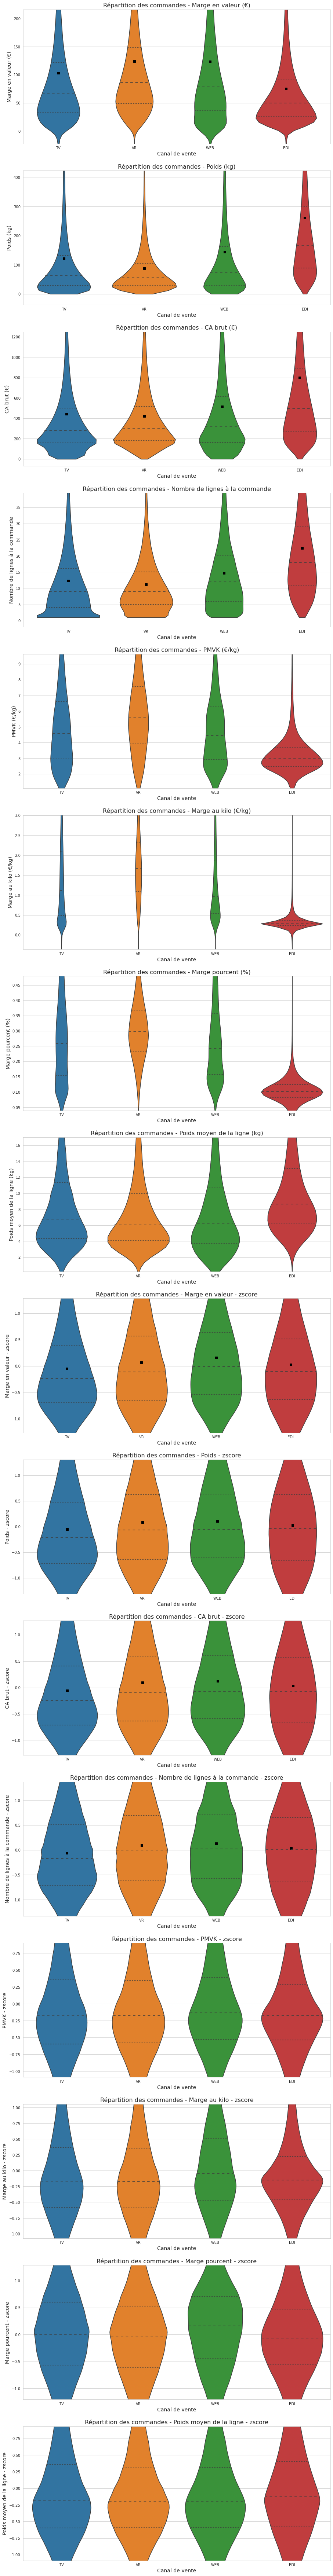

In [105]:
%%time

sns.set_style(style="whitegrid")

indicators = ['margin', 'weight', 'brutrevenue', 'linecount', 'PMVK', 'marginperkg', 'marginpercent', 'lineweight']
indicators_ = [indicator + '_clt_zscore' for indicator in indicators]
indicators = indicators + indicators_
# indicators = ['weight', 'brutrevenue']
x = 'origin2'
hue = None
fig, axs = plt.subplots(nrows=len(indicators), figsize=(15 , 8* len(indicators)), )
stats = compute_distribution(data=orders.loc[filter_otacos],
                             indicators=indicators,
                             x=x,
                             hue=hue,
                             percentile_selection=.98,
                             IQR_factor_selection=1.8,
                             IQR_factor_plot=.5,
                            )
plot_ranges = stats.T.groupby(level=0, axis=0).agg({'min_plot_selection': 'min',
                                                    'max_plot_selection': 'max',
                                                    'minimum_plot_range': 'min',
                                                    'maximum_plot_range': 'max',
                                                   })
reset = (orders.loc[filter_otacos]
               .reset_index()
               .astype({'origin2': pd.CategoricalDtype(['TV', 'VR', 'WEB', 'EDI'], ordered=True)})
        )

for i, indicator in enumerate(indicators):
    sns.violinplot(data=(reset.loc[(reset[indicator] >= plot_ranges.loc[indicator, 'min_plot_selection']) &
                                   (reset[indicator] <= plot_ranges.loc[indicator, 'max_plot_selection'])
                                  ]),
                   y=indicator,
                   x=x,
                   cut=0.,
                   hue=hue,
#                    scale='count',
                   inner='quartile',
                   ax=axs[i])
    axs[i].set_ylim(plot_ranges.loc[indicator, 'minimum_plot_range'],
                    plot_ranges.loc[indicator, 'maximum_plot_range'])
    if show_mean[indicator] and not hue:
        axs[i].scatter(x=[0, 1, 2, 3], y=[reset[[x, indicator]].groupby(x, observed=True).mean()], marker='s', color='k')
    axs[i].set_ylabel(libs[indicator], fontsize=14)
    axs[i].set_xlabel('Canal de vente', fontsize=14)
    axs[i].set_title('Répartition des commandes - ' + libs[indicator], fontsize=16)
#     ax.set_xticks([])
#     axs[i].grid(linestyle='--')

In [ ]:
axs[0].get_xticks()

In [ ]:
fig, axs = plt.subplots(figsize=(12, 20), nrows=len(indicators2) // 2, ncols=2, squeeze=False)
for j, indicator in enumerate(indicators2):
    x, y = j % (len(indicators2) // 2), j // (len(indicators2) // 2)
    sns.violinplot(data=status_updates.loc[:].reset_index(),
                y=indicator,
                x='new_stat',
                order=['TV', 'VR', 'WEB'],
#                 hue='new_stat',
#                 hue_order=['TV', 'VR', 'WEB'],
                ax=axs[x, y],
                cut=0.,
#                 scale='count', 
                
                inner='quartile',   
                showfliers=False,
                
                whis=0.,
                **boxplot_args,
               )

#     axs[x, y].get_legend().remove()
    axs[x, y].set_xlabel('Succursale')
#     axs[x, y].set_xticklabels([
#                                'ZK - Restau Com. Indépendante', 
#                                'ZL - Restau Com. Structurée',
#                                'ZI - Restau Coll. Autogérée',                               
#                                'ZJ - Restau Coll. Concédée',
#                               ])
    axs[x, y].xaxis.set_tick_params(rotation=45.)
fig.tight_layout()
axs[0, 0].set_ylim(-5, 200)
# handles, labels = axs[0, 0].get_legend_handles_labels()
# fig.legend(handles, labels, loc='center',ncol=4, bbox_to_anchor=(0, 1, 1, 0.12), bbox_transform=axs[0, 0].transAxes, )
fig.suptitle('Comparatif des différentes avant/après la première commande WEB', fontsize=16, y=1.025)

In [ ]:
fig, axs = plt.subplots(figsize=(12, 20), nrows=len(indicators2) // 2, ncols=2, squeeze=False)
for j, indicator in enumerate(indicators2):
    x, y = j % (len(indicators2) // 2), j // (len(indicators2) // 2)
    sns.boxplot(data=status_updates.reset_index(),
                y=indicator,
                x='new_stat',
                order=['TV', 'VR', 'WEB'],
#                 order=['ZK', 'ZL', 'ZI'],
#                 hue='new_stat',
#                 hue_order=['TV', 'VR', 'WEB'],
                ax=axs[x, y],
                showfliers=False,
                whis=0.,
                **boxplot_args,
               )
#     axs[x, y].get_legend().remove()
    axs[x, y].set_xlabel('Succursale')
#     axs[x, y].set_xticklabels([
#                                'ZK - Restau Com. Indépendante', 
#                                'ZL - Restau Com. Structurée',
#                                'ZI - Restau Coll. Autogérée',                               
#                                'ZJ - Restau Coll. Concédée',
#                               ])
    axs[x, y].xaxis.set_tick_params(rotation=45.)
fig.tight_layout()
handles, labels = axs[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc='center',ncol=4, bbox_to_anchor=(0, 1, 1, 0.12), bbox_transform=axs[0, 0].transAxes, )
fig.suptitle('Comparatif des différentes avant/après la première commande WEB', fontsize=16, y=1.025)

In [ ]:
fig, axs = plt.subplots(figsize=(12, 20), nrows=len(indicators2) // 2, ncols=2, squeeze=False)
for j, indicator in enumerate(indicators2):
    x, y = j % (len(indicators2) // 2), j // (len(indicators2) // 2)
    sns.boxplot(data=orders.reset_index(),
                y=indicator + '_clt_zscore',
                x='clt_stat',
                order=['TV', 'VR', 'WEB'],
#                 hue='new_stat',
#                 hue_order=['TV', 'VR', 'WEB'],
                ax=axs[x, y],
                showfliers=False,
                whis=0.,
                **boxplot_args,
               )
#     axs[x, y].get_legend().remove()
#     axs[x, y].set_xlabel('Succursale')
#     axs[x, y].set_xticklabels([
#                                'ZK - Restau Com. Indépendante', 
#                                'ZL - Restau Com. Structurée',
#                                'ZI - Restau Coll. Autogérée',                               
#                                'ZJ - Restau Coll. Concédée',
#                               ])
    axs[x, y].xaxis.set_tick_params(rotation=45.)
fig.tight_layout()
# handles, labels = axs[0, 0].get_legend_handles_labels()
# fig.legend(handles, labels, loc='center',ncol=4, bbox_to_anchor=(0, 1, 1, 0.12), bbox_transform=axs[0, 0].transAxes, )
fig.suptitle('Comparatif des différentes avant/après la première commande WEB - zscore', fontsize=16, y=1.025)

In [ ]:
fig, axs = plt.subplots(figsize=(12, 20), nrows=len(indicators2) // 2, ncols=2, squeeze=False)
for j, indicator in enumerate(indicators2):
    x, y = j % (len(indicators2) // 2), j // (len(indicators2) // 2)
    sns.boxplot(data=orders.reset_index(),
                y=indicator + '_clt_zscore',
                x='orgacom',
#                 order=['TV', 'VR', 'WEB'],
                hue='clt_stat',
                hue_order=['TV', 'VR', 'WEB'],
                ax=axs[x, y],
                showfliers=False,
                whis=0.,
                **boxplot_args,
               )
    axs[x, y].get_legend().remove()
    axs[x, y].set_xlabel('Succursale')
#     axs[x, y].set_xticklabels([
#                                'ZK - Restau Com. Indépendante', 
#                                'ZL - Restau Com. Structurée',
#                                'ZI - Restau Coll. Autogérée',                               
#                                'ZJ - Restau Coll. Concédée',
#                               ])
    axs[x, y].xaxis.set_tick_params(rotation=45.)
fig.tight_layout()
handles, labels = axs[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc='center',ncol=4, bbox_to_anchor=(0, 1, 1, 0.12), bbox_transform=axs[0, 0].transAxes, )
fig.suptitle('Comparatif des différentes avant/après la première commande WEB - zscore', fontsize=16, y=1.025)

In [ ]:
status_updates.reset_index().sort_values('client', ascending=True).set_index('client').iloc[200:250]

## Plot des détails

In [ ]:
colors = {'TV': 'blue', 'VR': 'orange', 'WEB': 'green'}
sample_clt = (
# '0000210861'
# '0000020511'
'0000020697'
)
to_plot = orders.loc[idx[:, sample_clt, :]].copy()
to_plot['color'] = to_plot['origin2'].map(colors)
to_plot

In [ ]:
status_plot = status_updates.loc[idx[: , sample_clt, :]]
status_plot

In [ ]:
ind_ = 'margin'

p = figure(x_axis_type="datetime", title='Détail pour ' + sample_clt + " - " + ind_, plot_height=500, plot_width=800)
first_box = BoxAnnotation(left=status_plot.index.get_level_values('date')[0],
#                           bottom=0.,
                          right=status_plot.index.get_level_values('date')[1],
                          fill_color='blue',
                          fill_alpha=.2,
                         )
p.add_layout(first_box)
second_box = BoxAnnotation(left=status_plot.index.get_level_values('date')[1],
#                            bottom=0.,
#                            right=status_plot.index.get_level_values(2)[1],
                           fill_color='green',
                           fill_alpha=.2,
                          )

p.add_layout(second_box)
p.ray(x=datetime.timestamp(status_plot.index.get_level_values('date')[0]) * 1000,
      y=(status_plot[ind_]).iloc[0],
      angle=0.,
      length=(datetime.timestamp(status_plot.index.get_level_values('date')[1]) - datetime.timestamp(status_plot.index.get_level_values('date')[0])) * 1000,
      line_color='blue',
      line_width=2)
p.ray(x=datetime.timestamp(status_plot.index.get_level_values('date')[1]) * 1000,
      y=(status_plot[ind_]).iloc[1],
      angle=0.,
      length=0,
      line_color='green',
      line_width=2)
p.circle(to_plot.index.get_level_values('date'), to_plot[ind_], color=to_plot.color)
show(p)

In [ ]:
to_plot

## Essai d'ajouter le choix de l'indicateur unitaire

In [ ]:
ind_ = 'brutrevenue'

p = figure(x_axis_type="datetime", title='Premier test', plot_height=500, plot_width=800)
first_box = BoxAnnotation(left=status_plot.index.get_level_values('date')[0],
#                           bottom=0.,
                          right=status_plot.index.get_level_values('date')[1],
                          fill_color='blue',
                          fill_alpha=.2,
                         )
p.add_layout(first_box)
second_box = BoxAnnotation(left=status_plot.index.get_level_values('date')[1],
#                            bottom=0.,
#                            right=status_plot.index.get_level_values(2)[1],
                           fill_color='green',
                           fill_alpha=.2,
                          )

p.add_layout(second_box)
p.ray(x=datetime.timestamp(status_plot.index.get_level_values('date')[0]) * 1000,
      y=(status_plot[ind_]).iloc[0],
      angle=0.,
      length=(datetime.timestamp(status_plot.index.get_level_values('date')[1]) - datetime.timestamp(status_plot.index.get_level_values('date')[0])) * 1000,
      line_color='blue',
      line_width=2)
p.ray(x=datetime.timestamp(status_plot.index.get_level_values('date')[1]) * 1000,
      y=(status_plot[ind_]).iloc[1],
      angle=0.,
      length=0,
      line_color='green',
      line_width=2)
p.circle(to_plot.index.get_level_values('date'), to_plot[ind_], color=to_plot.color)
show(p)

In [ ]:
status_updates

In [ ]:
status_updates['end_date'] = status_updates.reset_index().groupby(['orgacom', 'client'])['date'].shift(-1)

In [ ]:
status_updates.reset_index(inplace=True)

In [ ]:
status_updates

In [ ]:
status_updates.groupby(['orgacom', 'client'])['date'].shift(-1)

In [ ]:
status_updates['end_date'] = (
    status_updates.groupby(['orgacom', 'client'])['date']
                  .shift(-1, fill_value=np.nan)
)

In [ ]:
status_updates.end_date - status_updates.date

In [ ]:
for indicator in indicators2:
    status_update[indicator] = 

In [ ]:
with pd.option_context('display.max_rows', None):
    print(status_updates.head(100))

## Données de base article

In [ ]:
matfields = {'code article':'object',
              'libellé article':'category',
              'code gamme':'category',
              'libellé gamme':'category', 
              'MARC-MMSTA':'category',
              'MARC-LVORM':'category',
              'MVKE-LVORM':'category',
              'MVKE-MVSTA':'category',
              'MARA-LVORM':'category',
              'Hiérarchie produit':'object',
              'Type d\'article':'category',
              'Division':'object', 
              'Org. commerciale':'category', 
              'Canal distribution':'category',
              'File d\'achat':'category', 
              'Marque industrielle':'category', 
              'Marque commerciale':'category', 
              'Grpe de marchandises':'category', 
              'Poids net':'float', 
              'Unité de p':'category',
              'V1':'category',
              'V2':'category',
              'V3':'category',
              'LG1':'category',
              'LG2':'category',         
             }

df_mat = pd.read_csv(Path('..') / 'data' / 'Référentiel_ConverteO_1ALO_Art_20191209.csv', 
                     sep=';', 
                     header=0, 
                     encoding="ISO-8859-1", 
                     dtype=matfields,
                     decimal=",")
df_mat.sample(5)

In [ ]:
num_mat_mask = df_mat['code article'].str.isnumeric()
df_mat.loc[num_mat_mask, 'code article'] = df_mat.loc[num_mat_mask, 'code article'].str.zfill(18)
df_mat.set_index('code article', inplace=True, drop=True)
df_mat.sample(5)

In [ ]:
if sum(df_mat.index.duplicated()):
    raise RuntimeError('Something went wrong on the material dataframe! Some indices are duplicated!')

# Feature engineering et nettoyage
## Fusion des datasets
### Ajout des données articles
On ajoute dans un premier temps les données article.

In [ ]:
data2 = (
data.merge(df_mat, how='left', left_on='material', right_index=True, validate='many_to_one', indicator=True)
)

On contrôle que toutes les lignes de vente ont une contrepartie dans les données article.

In [ ]:
if len(data2.loc[data2._merge != 'both']) > 0:
    print('Some materials are missing in material master data!')
data2.drop('_merge', axis=1, inplace=True)

On contrôle qu'on n'a pas dupliqué de ligne (e.g. si un code article est en double dans les master data article).

In [ ]:
if len(data2) != len(data):
    raise RuntimeError('Looks like there were duplicate material numbers in material master data!')
data = data2
del data2
data.sample(5)

### Ajout des données client
On commence par fusionner les datasets.

In [ ]:
data2 = data.merge(df_clt,
                   how='left',
                   left_on=['orgacom', 'client'],
                   right_index=True,
                   validate='many_to_one',
                   indicator=True)

On contrôle que toutes les lignes de vente ont une contrepartie dans les données client.

In [ ]:
if len(data2.loc[data2._merge != 'both']) > 0:
    print('Some clients are missing in client master data!')
data2.drop('_merge', axis=1, inplace=True)

On contrôle qu'on n'a pas dupliqué de ligne (e.g. si un couple (orgacom x client) est en double dans les master data client).

In [ ]:
if len(data2) != len(data):
    print('Looks like there were duplicate orgacom x client keys in client master data!')
data = data2
del data2
data.sample(5)